 # **Objectives of the Study**

Given a healthcare dataset and understanding the features, the following objectives are taken for this study :

- Prediction of **Length of Hospitalisation** for different patients being admitted to hospitals.
- Prediction of respective **Billing Amount** of medication. 

# Introduction

**About Dataset**

**Context**:

This synthetic healthcare dataset has been created to serve as a valuable resource for data science, machine learning, and data analysis enthusiasts. It is designed to mimic real-world healthcare data, enabling users to practice, develop, and showcase their data manipulation and analysis skills in the context of the healthcare industry.

**Inspiration**:

The inspiration behind this dataset is rooted in the need for practical and diverse healthcare data for educational and research purposes. Healthcare data is often sensitive and subject to privacy regulations, making it challenging to access for learning and experimentation. To address this gap, I have leveraged Python's Faker library to generate a dataset that mirrors the structure and attributes commonly found in healthcare records. By providing this synthetic data, I hope to foster innovation, learning, and knowledge sharing in the healthcare analytics domain.

**Dataset Information**:

Each column provides specific information about the patient, their admission, and the healthcare services provided, making this dataset suitable for various data analysis and modeling tasks in the healthcare domain. Here's a brief explanation of each column in the dataset -

- Name: This column represents the name of the patient associated with the healthcare record.
- Age: The age of the patient at the time of admission, expressed in years.
- Gender: Indicates the gender of the patient, either "Male" or "Female."
- Blood Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O--", etc.).
- Medical Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.
- Date of Admission: The date on which the patient was admitted to the healthcare facility.
- Doctor: The name of the doctor responsible for the patient's care during their admission.
- Hospital: Identifies the healthcare facility or hospital where the patient was admitted.
- Insurance Provider: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."
- Billing Amount: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.
- Room Number: The room number where the patient was accommodated during their admission.
- Admission Type: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.
- Discharge Date: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.
- Medication: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."
- Test Results: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.

**Usage Scenarios**:

This dataset can be utilized for a wide range of purposes, including:

- Developing and testing healthcare predictive models.
- Practicing data cleaning, transformation, and analysis techniques.
- Creating data visualizations to gain insights into healthcare trends.
- Learning and teaching data science and machine learning concepts in a healthcare context.
- You can treat it as a Multi-Class Classification Problem and solve it for Test Results which contains 3 categories(Normal, Abnormal, and Inconclusive).

# Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

In [2]:
zip_path = r"C:\Users\ncc777\Desktop\my_tasks\Week_15\kaggle\a\archive (7).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.printdir()
    #zip_ref.extractall("Datasets")

File Name                                             Modified             Size
healthcare_dataset.csv                         2024-05-08 12:15:18      8399221


In [3]:
with zipfile.ZipFile(zip_path) as z:
    with z.open('healthcare_dataset.csv') as f:
        df = pd.read_csv(f,sep = ",")

In [4]:
def load_and_pda(df):
    """
    Loads dataset, performs basic PDA
    
    Steps:
    1. Load CSV file.
    2. Basic info 
    3. missing values
    4. Check for duplicates
    5. PDA by feature type
    """

    # === 1. Load dataset ===
    try:
        with zipfile.ZipFile(zip_path) as z:
            with z.open('healthcare_dataset.csv') as f:
                df = pd.read_csv(f,sep = ",")
        print(f"Dataset loaded successfully: {df}")
        print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

    # === 2. Basic Info ===
    print("=== DATA INFO ===")
    print(df.info())
    print("\n=== FIRST 5 ROWS ===")
    print(df.head())
    print("\n=== LAST 5 ROWS ===")
    print(df.tail())
    print("\n=== SUMMARY STATISTICS ===")
    print(df.describe().T)

    # === 3. Missing Values ===
    print("\n=== MISSING VALUE PERCENTAGES ===")
    missing = df.isnull().mean() * 100
    print(missing[missing > 0].sort_values(ascending=False))


    # === 4. Check for duplicates
    print("\n2. Duplicate Rows:")
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    if duplicates > 0:
        print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")

    # === 5. PDA by Feature Type ===
    numerical = df.select_dtypes(include=['int64', 'float64']).columns
    categorical = df.select_dtypes(exclude=['int64', 'float64']).columns

    print(f"\nNumerical features: {list(numerical)}")
    print(f"Categorical features: {list(categorical)}")

    return df


In [5]:
df = load_and_pda(df)

Dataset loaded successfully:                     Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith              

In [22]:
# import pandas as pd

# data = pd.read_csv('/kaggle/input/healthcare-dataset/healthcare_dataset.csv')
# data.info()
# data.head()

**Insights**:

- There are no missing values (All are non-null values)
- There are 15 columns and 55500 entries.
- **Demographic variables** : Name, Age, Gender, Blood Type
- **Independent variables** : Medical Condition, Admission Type, Medication
- **Other information** : Doctor, Hospital, Insurance Provider, Room Number
- **Dependent variables** : Length of Hospitalisation = Discharge Date - Date of Admission, Test Results, Billing Amount
- Except 'Age', since all are independent variables are categorical, so we recommend to convert the 'Age' as categorical by binning.

In [23]:
#binning using pd.cut for Age

# data['Label'] = pd.cut(data['Age'], bins=[13, 25, 40, 55, 70, 90],labels=['Age1', 'Age2', 'Age3','Age4','Age5'])

In [6]:
def check_unique_values(df):
    """
    Prints the number of unique values and the unique entries
    for each column in the DataFrame.
    """
    for col in df.select_dtypes(include='object'):
        unique_vals = df[col].unique()
        print(f"\nColumn: {col}")
        print(f"Unique count: {len(unique_vals)}")
        print(f"Unique values: {unique_vals}")

In [8]:
check_unique_values(df)


Column: Name
Unique count: 49992
Unique values: ['Bobby JacksOn' 'LesLie TErRy' 'DaNnY sMitH' ... 'LiSa sIMPsoN'
 'RoGER farRELl' 'kaTheRIne WeBSTer']

Column: Gender
Unique count: 2
Unique values: ['Male' 'Female']

Column: Blood Type
Unique count: 8
Unique values: ['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']

Column: Medical Condition
Unique count: 6
Unique values: ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']

Column: Date of Admission
Unique count: 1827
Unique values: ['2024-01-31' '2019-08-20' '2022-09-22' ... '2019-05-31' '2023-10-12'
 '2021-03-14']

Column: Doctor
Unique count: 40341
Unique values: ['Matthew Smith' 'Samantha Davies' 'Tiffany Mitchell' ... 'Deborah Sutton'
 'Mary Bartlett' 'Alec May']

Column: Hospital
Unique count: 39876
Unique values: ['Sons and Miller' 'Kim Inc' 'Cook PLC' ... 'Guzman Jones and Graves,'
 'and Williams, Brown Mckenzie' 'Moreno Murphy, Griffith and']

Column: Insurance Provider
Unique count: 5
Unique values: ['Blue Cross' '

----------------------------------------------------------------
 ### **1. Univariate analysis**
 ---------------------------------------------------------------

In [9]:
def univariate_numerical_eda(df, column, save_folder="EDA_Charts"):
    """
    Performs univariate EDA on a single numerical column.
    Includes:
    - Summary statistics
    - Skewness, Kurtosis
    - Outlier detection (IQR-based)
    - Histogram + Boxplot
    - Saves each figure automatically to a folder
    """

    # Create folder if it doesn’t exist
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    print(f"\nFeature: {column}")
    print("="*60)
    print(df[column].describe().to_frame())

    # --- Summary ---
    total = len(df[column])
    missing = df[column].isna().sum()
    unique = df[column].nunique()

    print(f"Missing values: {missing} ({(missing/total)*100:.2f}%)")
    print(f"Unique values: {unique}")

    skew = df[column].skew()
    kurt = df[column].kurt()

    print(f"\nSkewness: {skew:.3f}")
    print(f"Kurtosis: {kurt:.3f}")

    # ====== OUTLIER CHECK (IQR Method) ======
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    n_outliers = len(outliers)
    outlier_pct = (n_outliers / len(df)) * 100

    print(f"\nOutliers detected: {n_outliers} ({outlier_pct:.2f}%)")
    print(f"Outlier range: below {lower_bound:.2f} or above {upper_bound:.2f}")

    # ====== INTERPRETATION ======
    if abs(skew) > 0.7:
        skew_status = "high"
        print(f"\n{column} is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.")
    elif abs(skew) > 0.3:
        skew_status = "moderate"
        print(f"{column} is mildly skewed. A mild transformation (√ or cube root) may help.")
    else:
        skew_status = "normal"
        print(f"{column} is fairly symmetric — no transformation likely needed.")

    if abs(kurt) > 1.0:
        kurt_status = "high"
        print(f"{column} shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.")
    elif abs(kurt) > 0.5:
        kurt_status = "moderate"
        print(f"{column} has mildly heavy tails. Light transformation or scaling may help.")
    else:
        kurt_status = "normal"
        print(f"{column} has fairly normal kurtosis — suitable for most ML models.")

    # Combined skew–kurtosis insight
    if (skew_status in ["high", "moderate"]) and kurt_status == "normal":
        print("\nFocus on correcting skew (e.g., log-transform); no heavy outlier correction needed.")
    elif (skew_status in ["high", "moderate"]) and (kurt_status in ["high", "moderate"]):
        print("\nThe variable is both skewed and heavy-tailed — consider transformation and outlier capping.")
    elif skew_status == "normal" and kurt_status == "normal":
        print("\nThe variable is approximately normal — no transformation needed.")

    # ====== PLOTS ======
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram + KDE
    sns.histplot(df[column], kde=True, bins=30, color='salmon', ax=axes[0])
    axes[0].set_title(f'Distribution of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df[column], color='seagreen', ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)

    plt.tight_layout()

    # Save the combined figure
    save_path = os.path.join(save_folder, f"{column}_univariate_plot.png")
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    print(f" Saved plot for '{column}' → {save_path}")

    plt.show()
    plt.close(fig)



Feature: Age
                Age
count  55500.000000
mean      51.539459
std       19.602454
min       13.000000
25%       35.000000
50%       52.000000
75%       68.000000
max       89.000000
Missing values: 0 (0.00%)
Unique values: 77

Skewness: -0.006
Kurtosis: -1.186

Outliers detected: 0 (0.00%)
Outlier range: below -14.50 or above 117.50
Age is fairly symmetric — no transformation likely needed.
Age shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.
 Saved plot for 'Age' → EDA_Charts\Age_univariate_plot.png


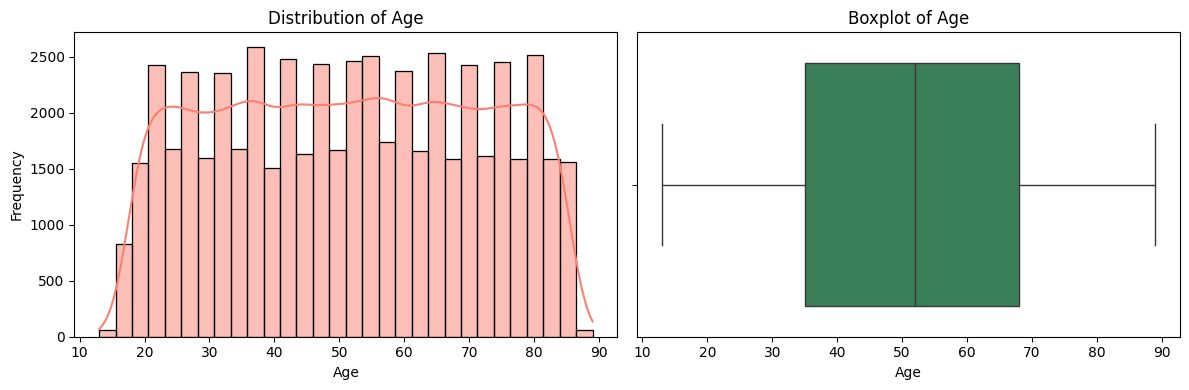


Feature: Billing Amount
       Billing Amount
count    55500.000000
mean     25539.316097
std      14211.454431
min      -2008.492140
25%      13241.224652
50%      25538.069376
75%      37820.508436
max      52764.276736
Missing values: 0 (0.00%)
Unique values: 50000

Skewness: -0.001
Kurtosis: -1.191

Outliers detected: 0 (0.00%)
Outlier range: below -23627.70 or above 74689.43
Billing Amount is fairly symmetric — no transformation likely needed.
Billing Amount shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.
 Saved plot for 'Billing Amount' → EDA_Charts\Billing Amount_univariate_plot.png


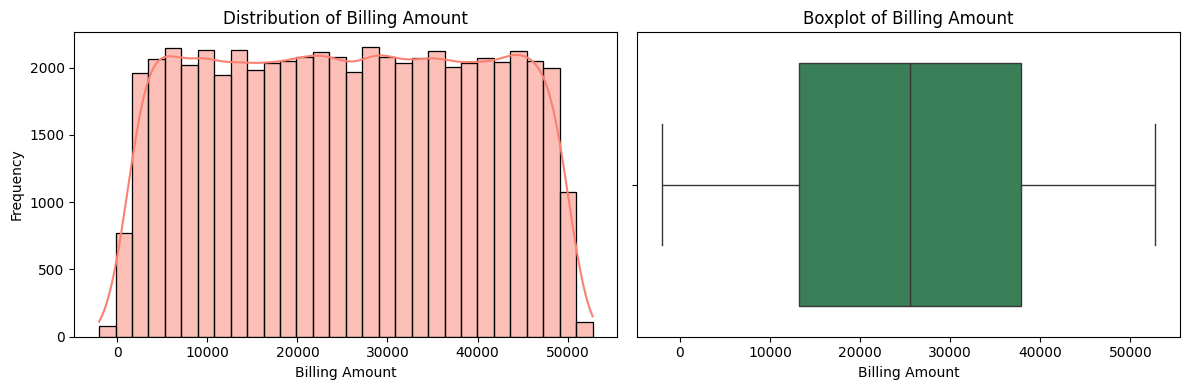


Feature: Room Number
        Room Number
count  55500.000000
mean     301.134829
std      115.243069
min      101.000000
25%      202.000000
50%      302.000000
75%      401.000000
max      500.000000
Missing values: 0 (0.00%)
Unique values: 400

Skewness: -0.011
Kurtosis: -1.194

Outliers detected: 0 (0.00%)
Outlier range: below -96.50 or above 699.50
Room Number is fairly symmetric — no transformation likely needed.
Room Number shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.
 Saved plot for 'Room Number' → EDA_Charts\Room Number_univariate_plot.png


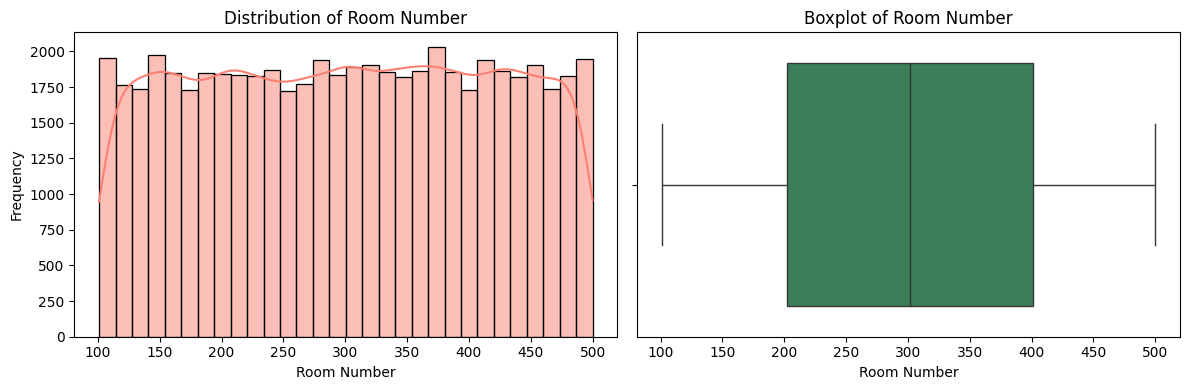

In [10]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    univariate_numerical_eda(df, col)

In [ ]:
def univariate_categorical_eda(df, column, save_folder="EDA_Categorical_Charts"):
    """
    Performs univariate EDA on a single categorical column.
    Displays frequency distribution, proportion, missing values,
    and visualizations (bar plot + pie chart).
    Automatically saves each plot to a folder.
    Provides ML preprocessing suggestions.
    """

    # Create folder if it doesn’t exist
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    print(f"\nFeature: {column}")
    print("="*45)

    # --- Summary ---
    total = len(df[column])
    missing = df[column].isna().sum()
    unique = df[column].nunique()
    mode_val = df[column].mode()[0] if unique > 0 else None

    print(f"Total observations: {total}")
    print(f"Missing values: {missing} ({(missing/total)*100:.2f}%)")
    print(f"Unique categories: {unique}")
    print(f"Most frequent category: {mode_val}")

    # --- Frequency Table ---
    freq = df[column].value_counts(dropna=False)
    perc = df[column].value_counts(normalize=True, dropna=False) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': perc.round(2)})
    print("\nCategory Distribution:")
    print(summary)

    # --- Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Bar Plot
    sns.countplot(x=df[column], palette='Set2', order=freq.index, ax=axes[0])
    axes[0].set_title(f"Frequency of {column}", fontsize=13)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='x', rotation=30)

    # Pie Chart
    axes[1].pie(freq, labels=freq.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f"Proportion of {column}", fontsize=13)

    plt.tight_layout()

    # --- Save Chart ---
    save_path = os.path.join(save_folder, f"{column}_categorical_plot.png")
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    print(f"Saved plot for '{column}' → {save_path}")

    # Optional: show inline
    plt.show()

    plt.close(fig)

    # --- ML Preprocessing Suggestions ---
    if unique == 2:
        print(f" {column} is binary — suitable for Label Encoding (0/1).")
    elif 2 < unique <= 10:
        print(f" {column} has moderate categories — use One-Hot Encoding.")
    elif unique > 10:
        print(f" {column} has many unique categories — consider frequency encoding or feature grouping.")
    else:
        print(f" {column} seems low cardinality — standard encoding should work fine.")

    if (missing / total) > 0.05:
        print(f" Missing values exceed 5% — consider imputing or flagging missingness.")


In [ ]:
# We can loop to save time
for col in  df.select_dtypes(exclude=['int64', 'float64']).columns.tolist():
   univariate_categorical_eda(df, col)

In [25]:
# data.describe(include='object')

**Insights**:

Which variables will not be considered for analysis ?

As the number of doctors, hospitals and names of patients are relatively very high, they do not play any role in the study.


**Study Variables** :
Age, Gender, Blood Type, Medical Condition, Insurance Provider, Admission Type, Medication, Test Results, Length of Hospitalisation

In [ ]:
# #Creating a separate column for length of hospitalisation
# data['Length of Hospitalisation'] = (
#     pd.to_datetime(data['Discharge Date']) - pd.to_datetime(data['Date of Admission'])
# ).dt.days

# data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Label,Length of Hospitalisation
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Age2,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Age4,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Age5,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Age2,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,Age3,20


# Data Analysis

Finding the dependencies

## Outlier Detection


Finding the outliers use IQR method

In [6]:
#Inter-Quartile Method for Outlier Detection
numeric_data = data.select_dtypes(include=['number'])

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)
data = data[~outliers]
print(data.shape)

(55500, 17)


Finding the outliers use Z-score method

In [7]:
#Z-score Method for Outlier Detection
mean = numeric_data.mean()
std = numeric_data.std()
z_scores = (numeric_data - mean) / std
outliers = (z_scores > 3) | (z_scores < -3)
data = data[~outliers.any(axis=1)]
print(data.shape)

(55500, 17)


**Insights**:

We identified that data doesn't show any outliers

## Basic Statistical Analysis

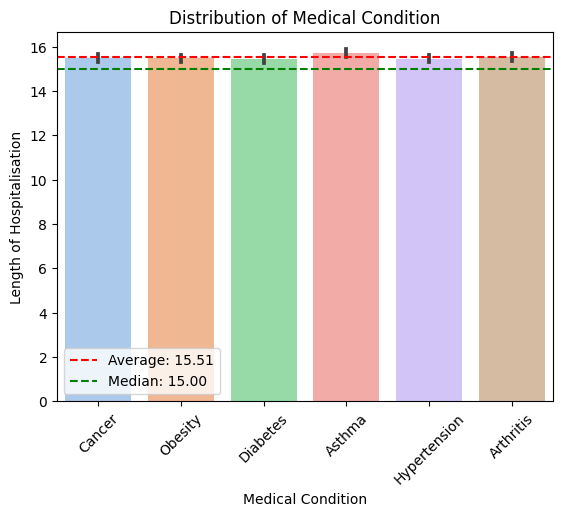

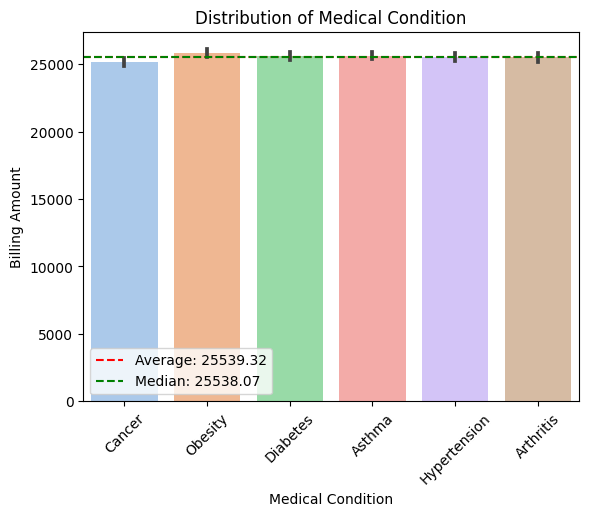

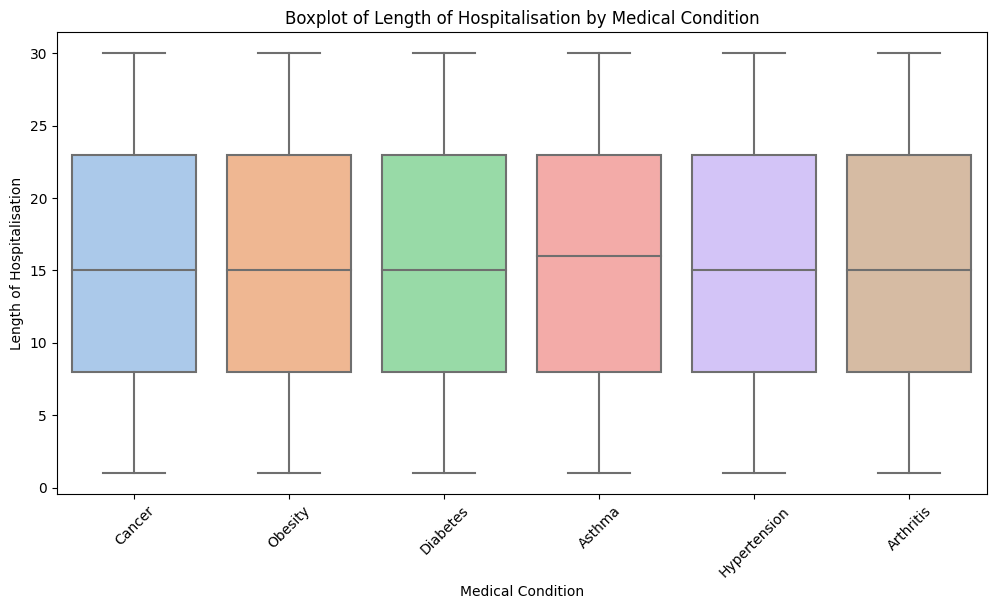

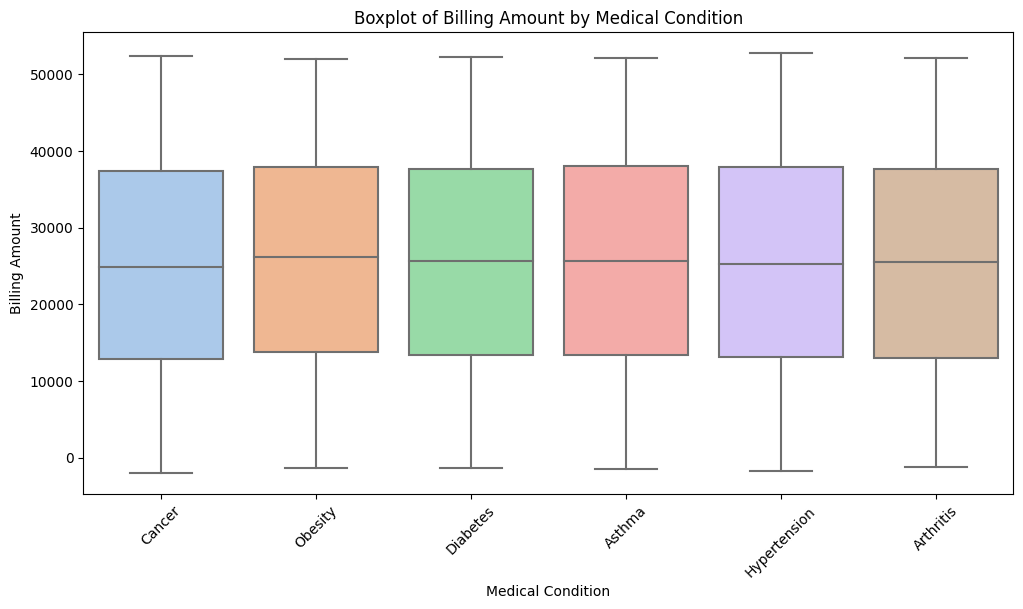

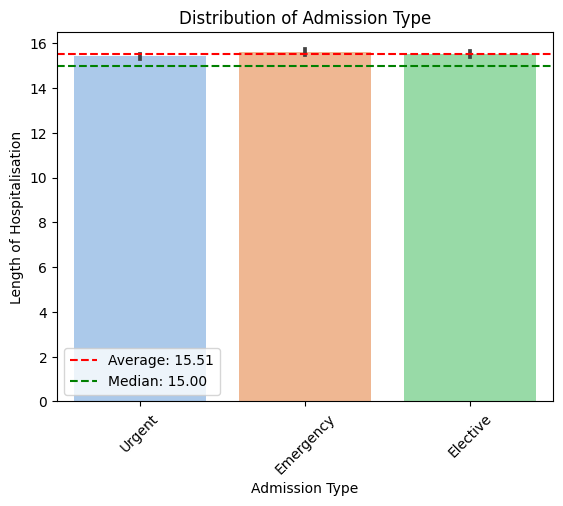

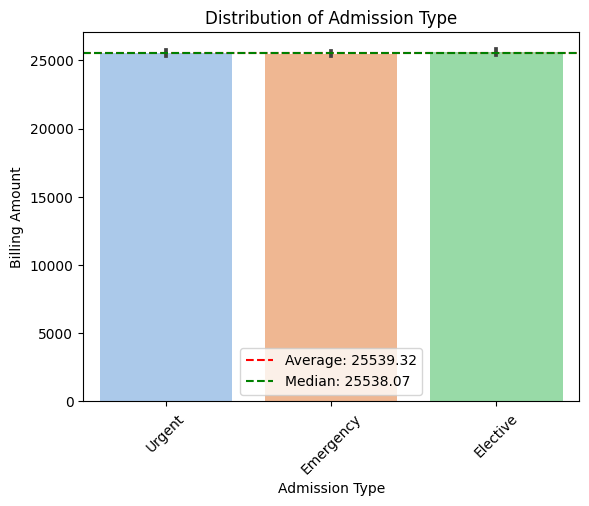

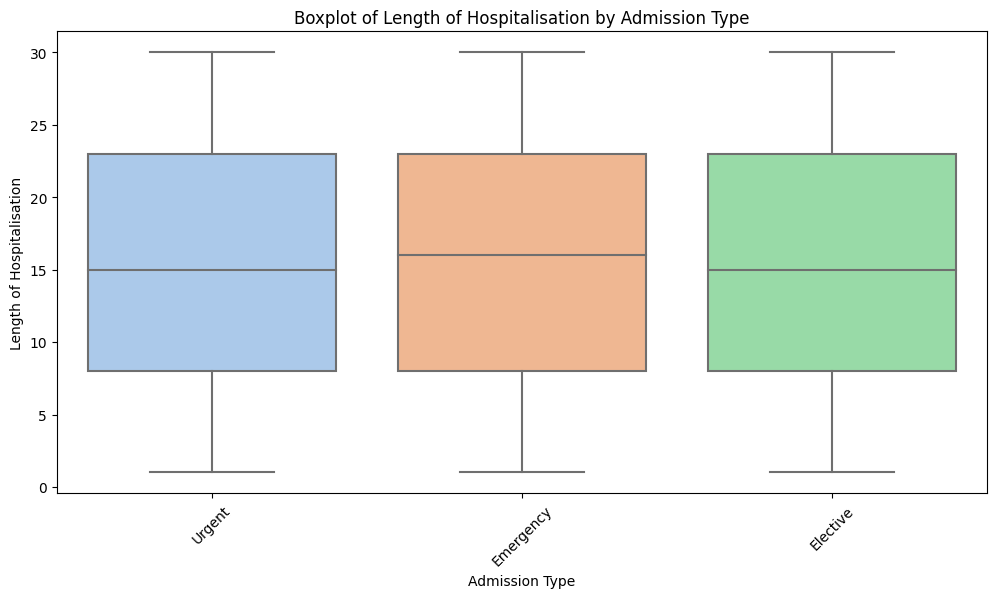

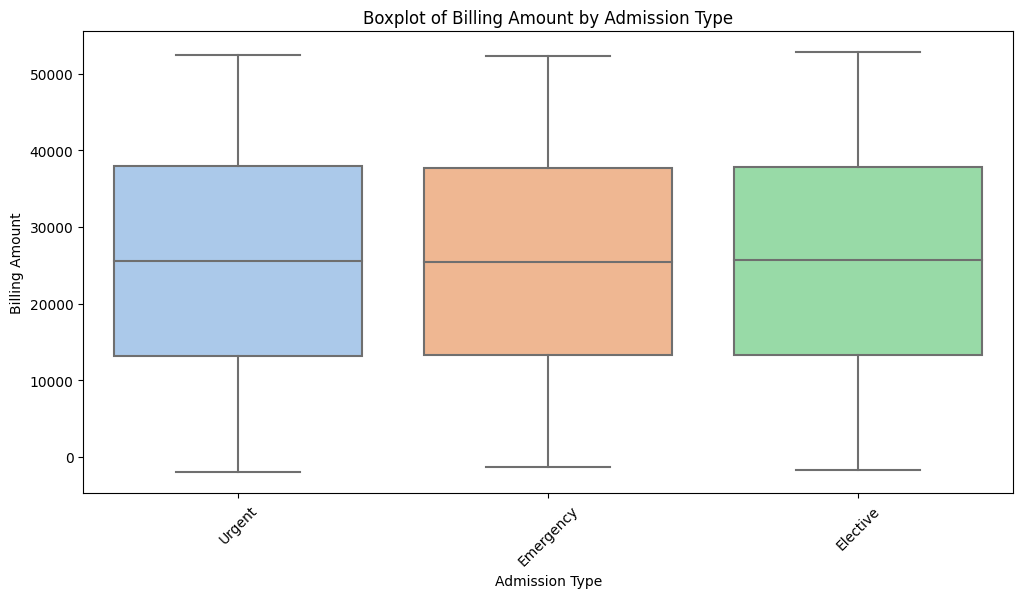

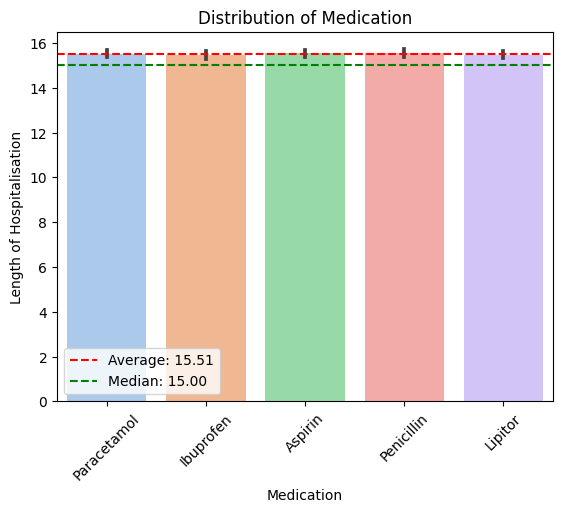

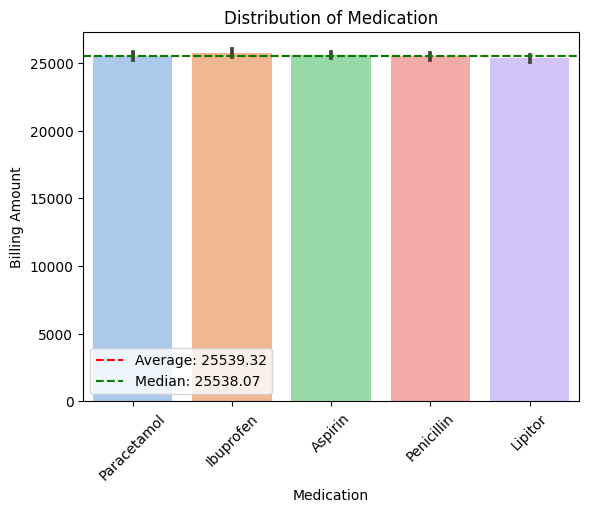

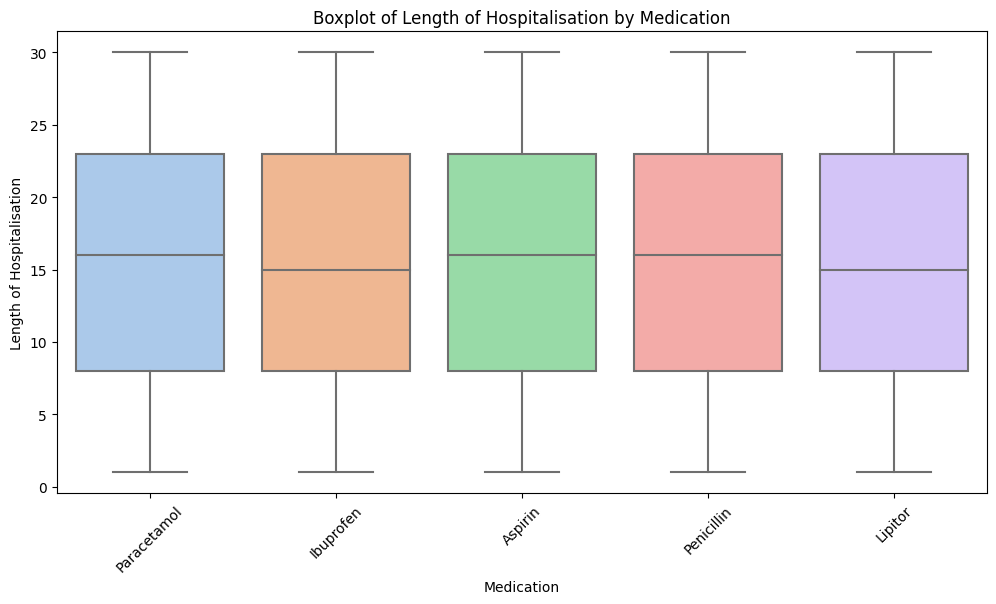

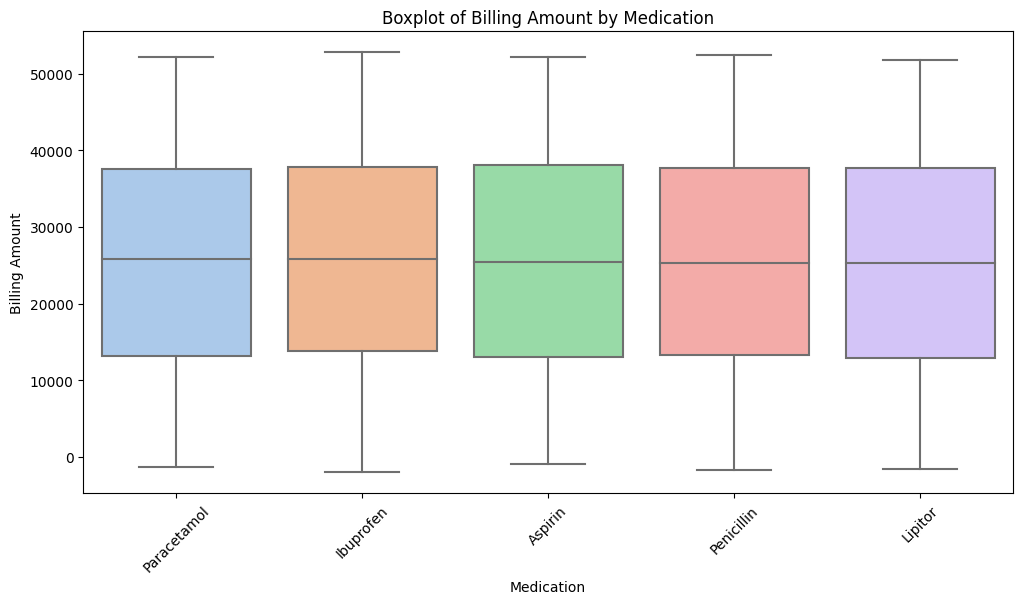

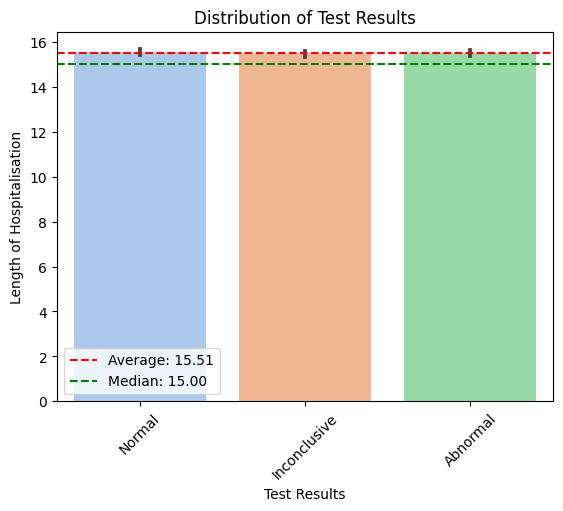

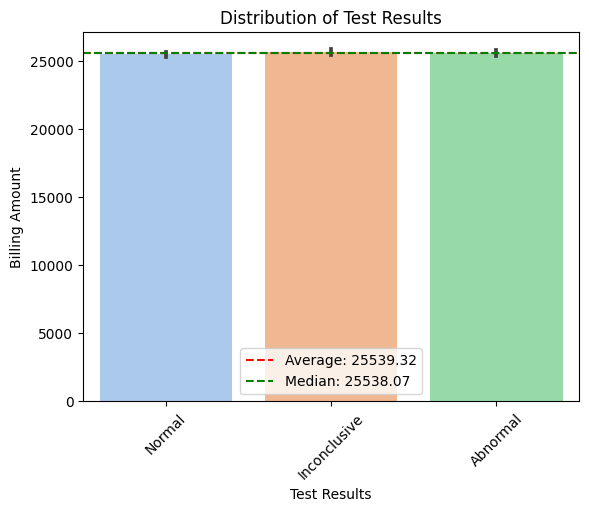

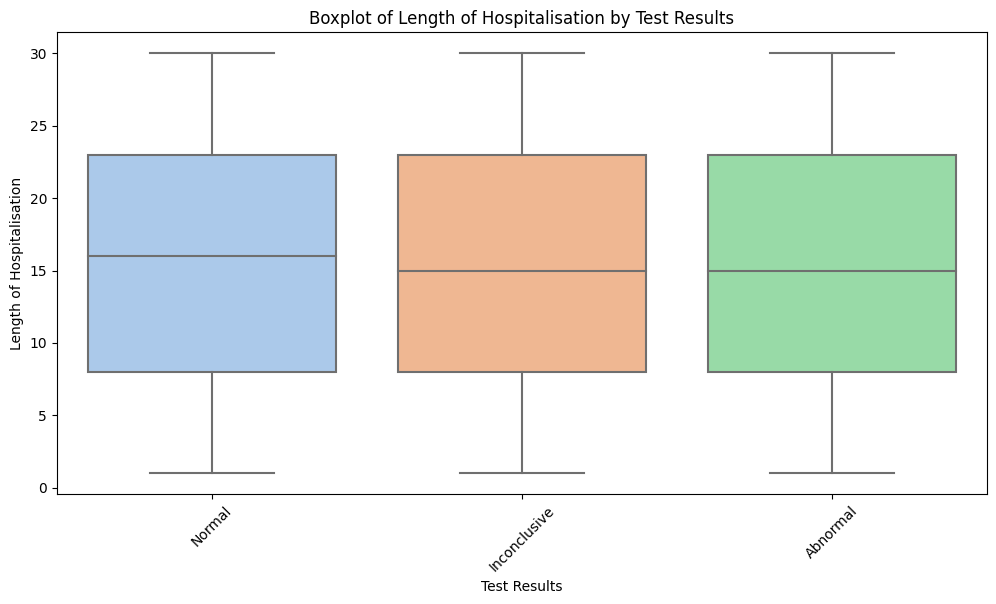

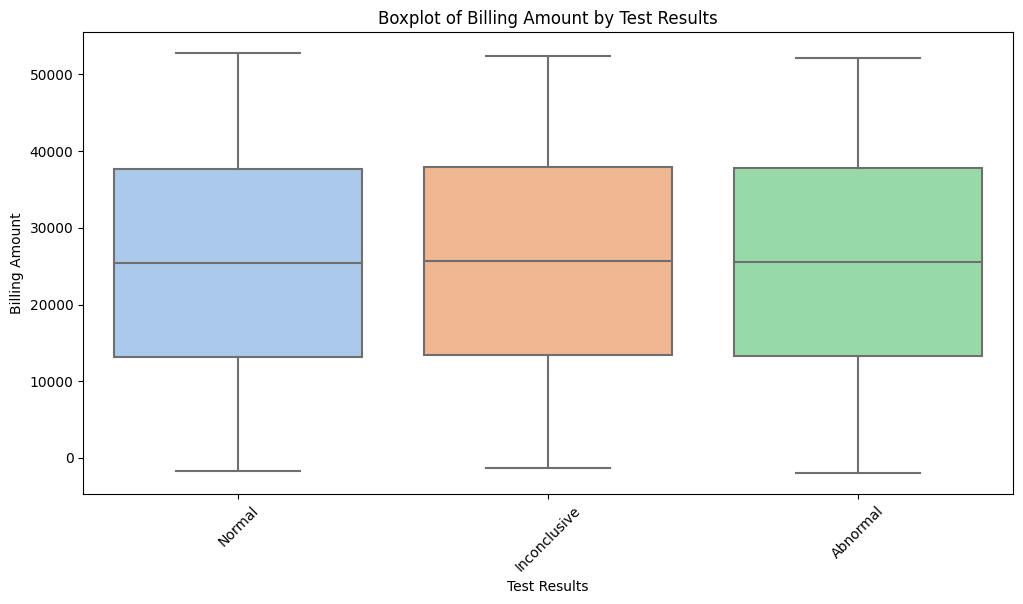

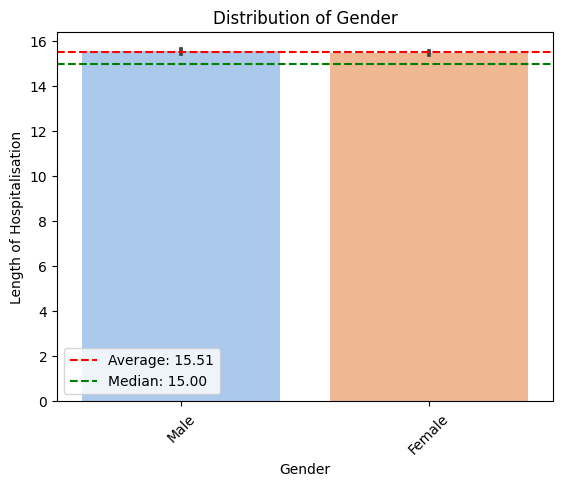

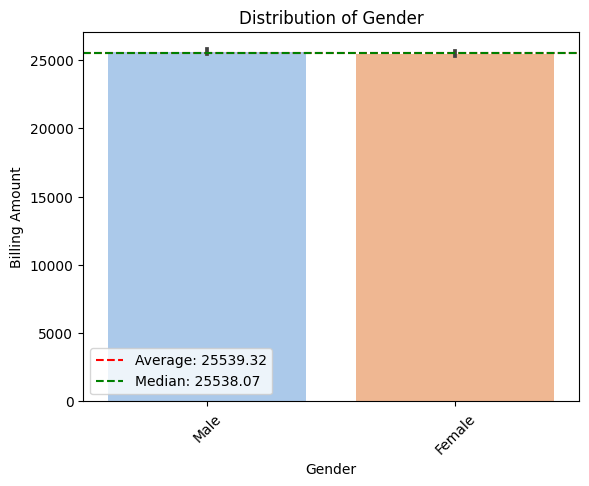

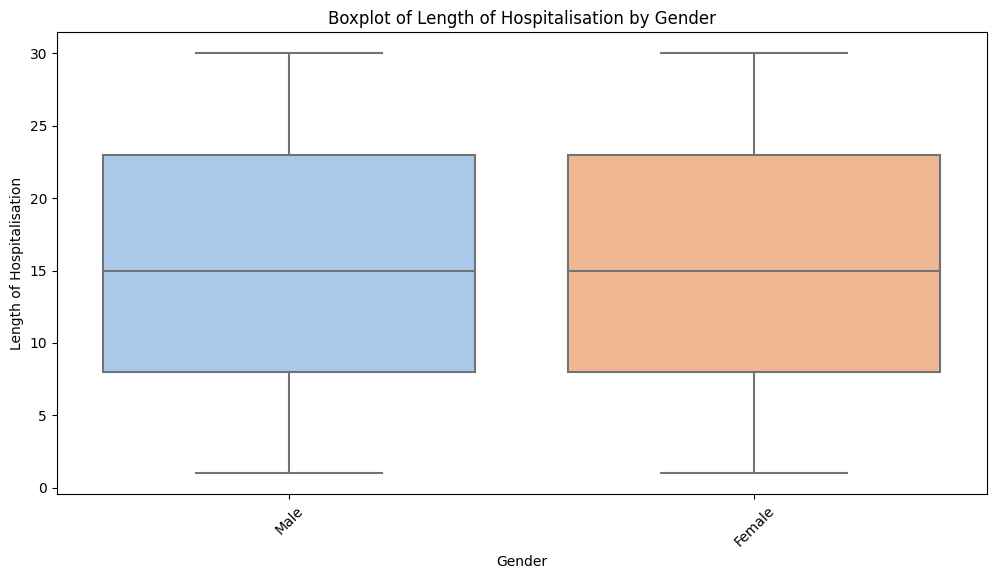

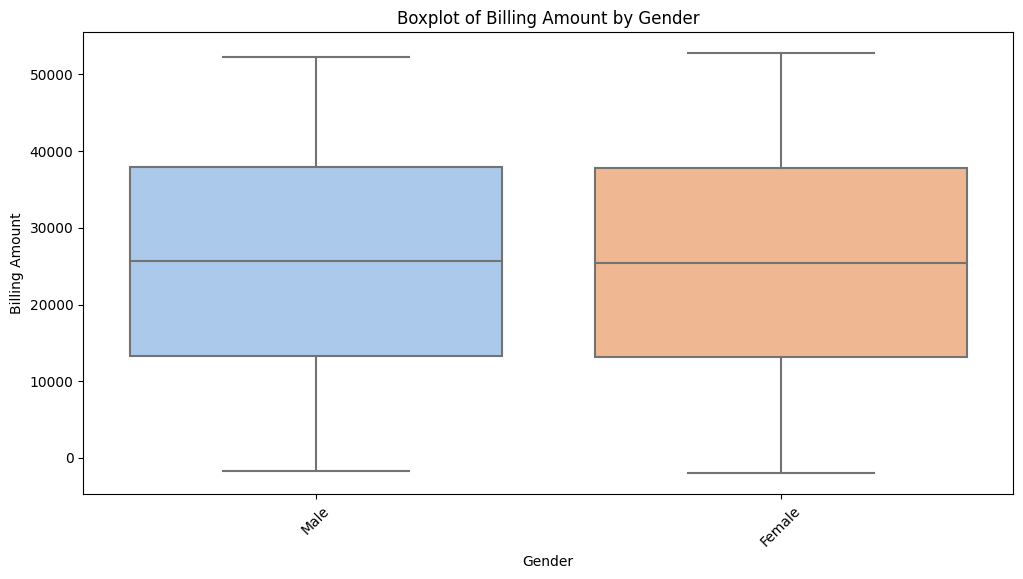

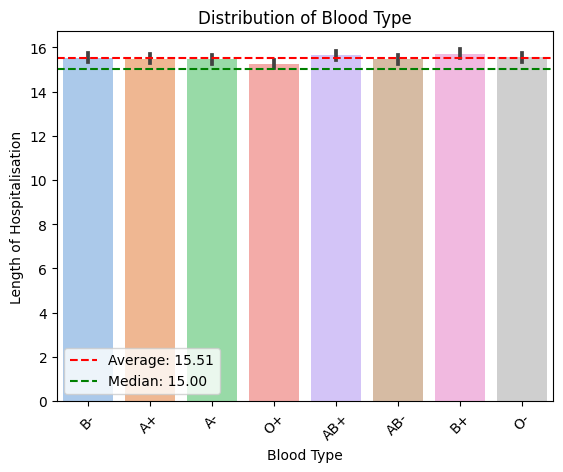

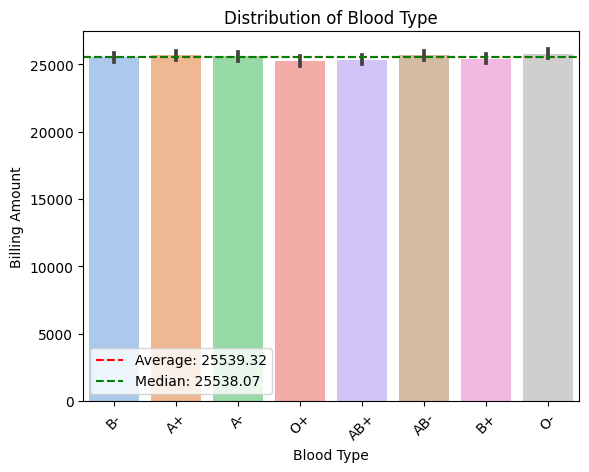

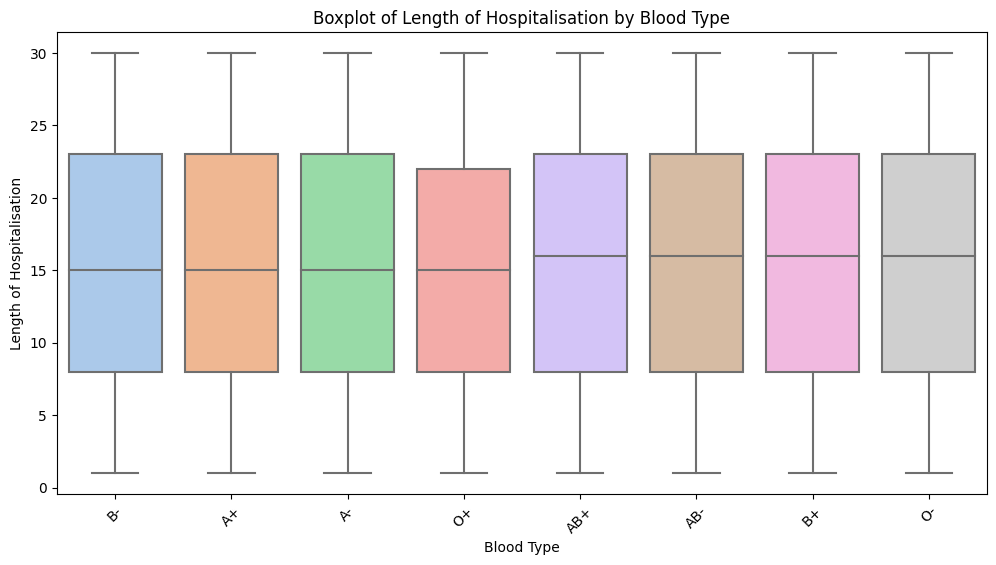

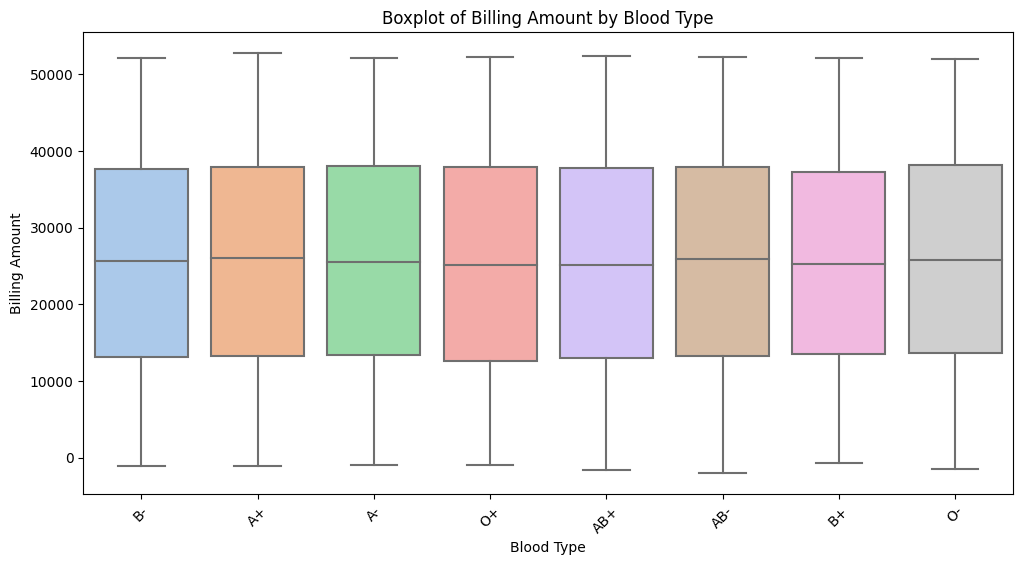

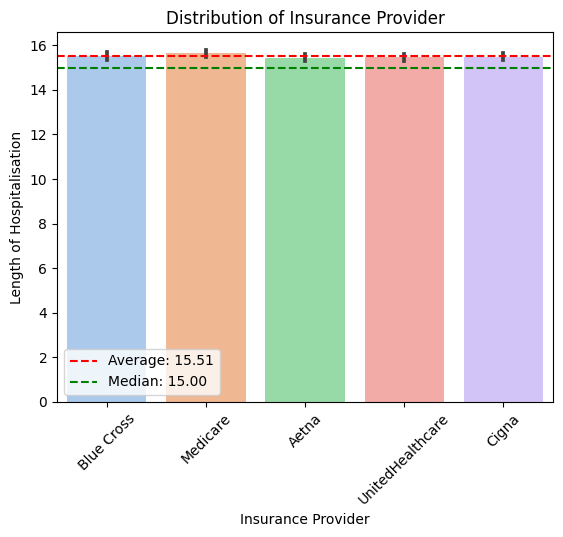

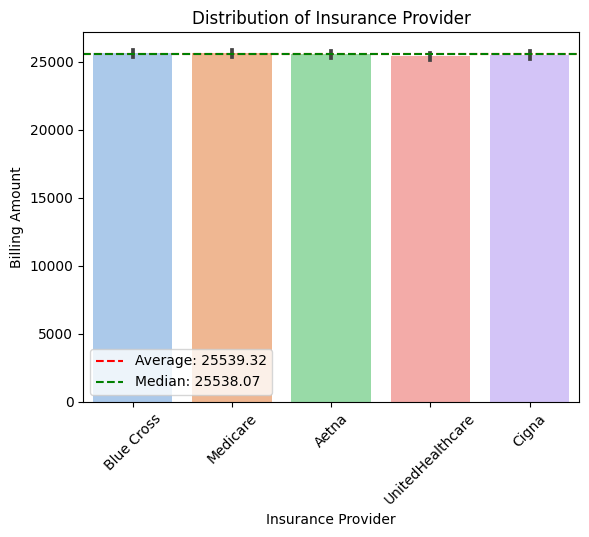

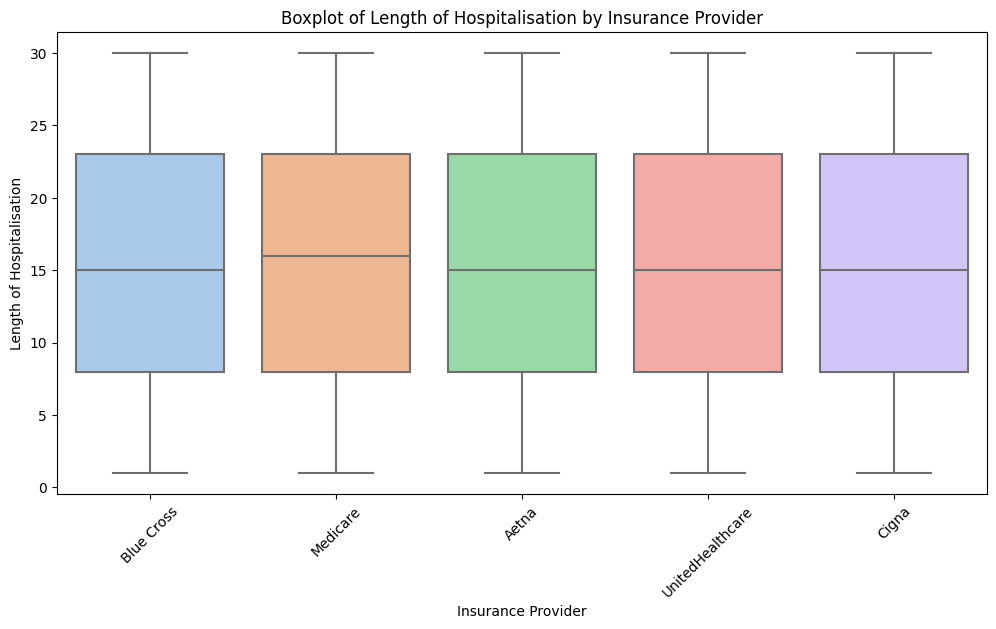

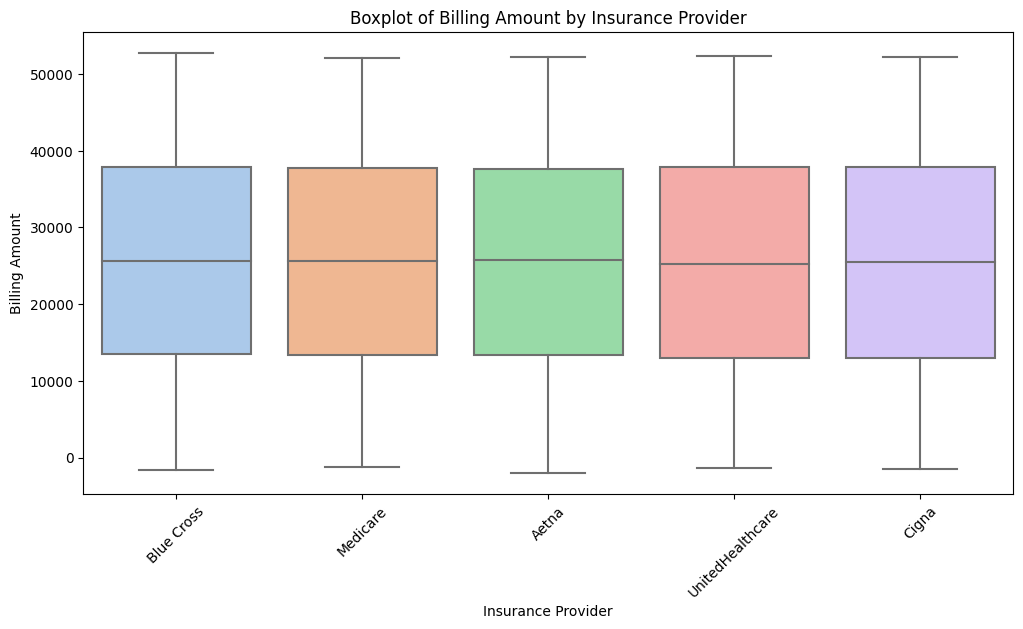

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


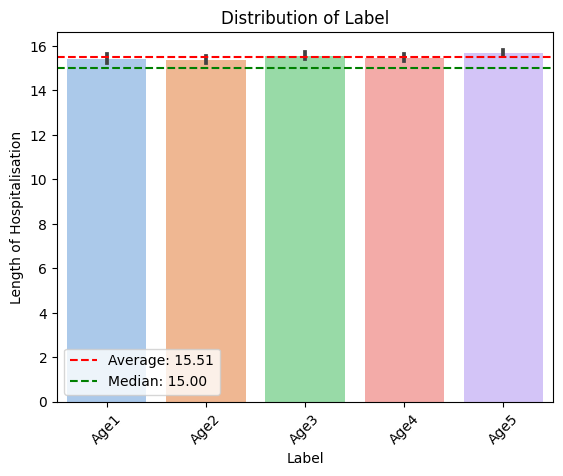

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


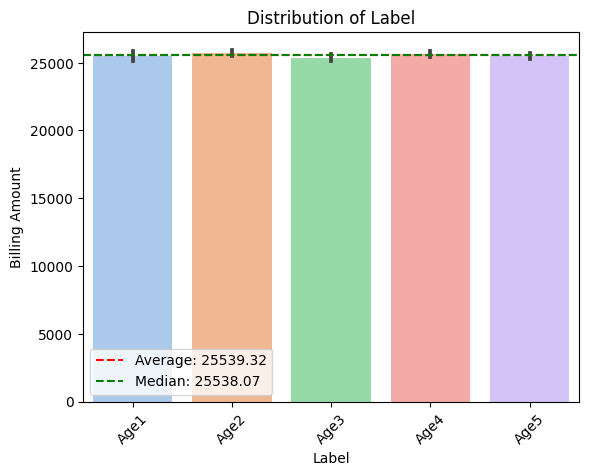

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


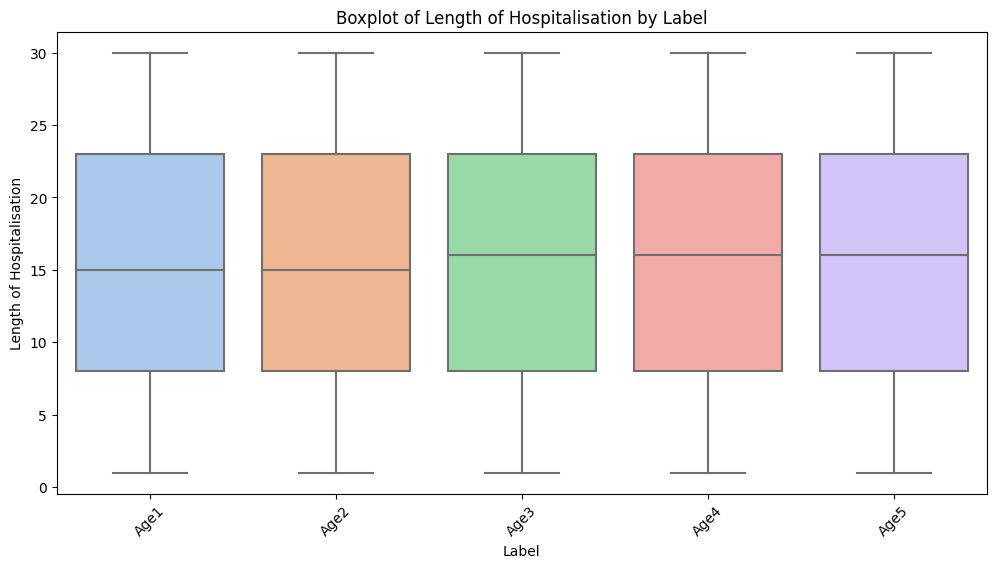

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


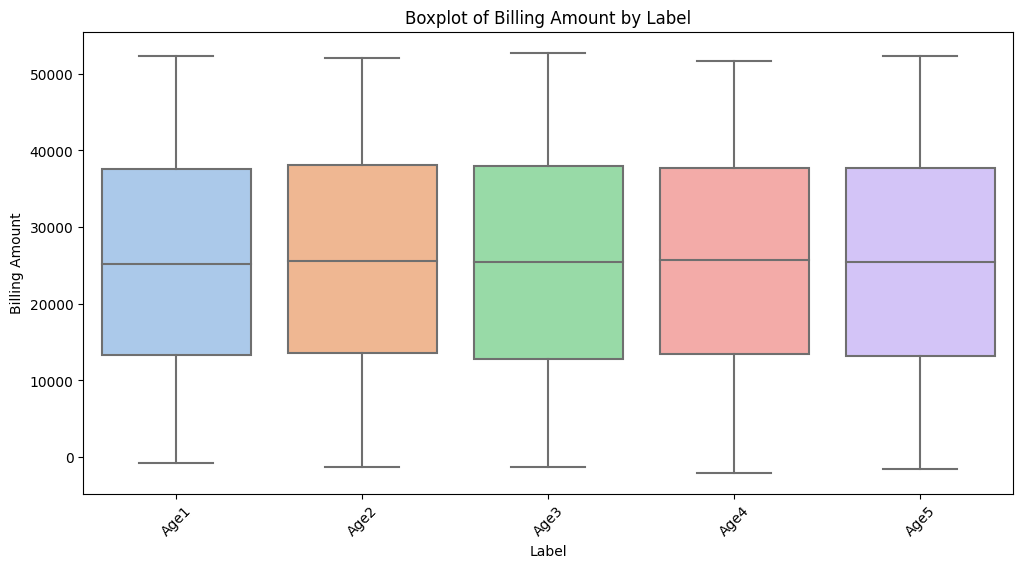

In [8]:
# Finding Basic Statistics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

columns = ['Medical Condition', 'Admission Type', 'Medication', 'Test Results','Gender','Blood Type','Insurance Provider','Label']
# We already converted Age to Label using binning so we may not use it
for col in columns:
  average_value = np.mean(data['Length of Hospitalisation'])
  median_value = np.median(data['Length of Hospitalisation'])
  sns.barplot(x=col,y='Length of Hospitalisation', data=data, palette='pastel')
  plt.title(f'Distribution of {col}')
  plt.axhline(y=average_value, color='red', linestyle='--', label=f'Average: {average_value:.2f}')
  plt.axhline(y=median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')
  plt.legend()
  plt.xticks(rotation=45)
  plt.show()
  average_value1 = np.mean(data['Billing Amount'])
  median_value1 = np.median(data['Billing Amount'])
  sns.barplot(x=col,y='Billing Amount', data=data, palette='pastel')
  plt.title(f'Distribution of {col}')
  plt.axhline(y=average_value1, color='red', linestyle='--', label=f'Average: {average_value1:.2f}')
  plt.axhline(y=median_value1, color='green', linestyle='--', label=f'Median: {median_value1:.2f}')
  plt.legend()
  plt.xticks(rotation=45)
  plt.show()
  plt.figure(figsize=(12, 6))
  sns.boxplot(x=col, y='Length of Hospitalisation', data=data, palette='pastel')
  plt.title(f'Boxplot of Length of Hospitalisation by {col}')
  plt.xticks(rotation=45)
  plt.show()
  plt.figure(figsize=(12, 6))
  sns.boxplot(x=col, y='Billing Amount', data=data, palette='pastel')
  plt.title(f'Boxplot of Billing Amount by {col}')
  plt.xticks(rotation=45)
  plt.show()

**Insight**:

The above plots show that the above study variables do not show significant effect on Length of Hospitalisation or Billing Amount.

To furthur test statistically, ANOVA has to be done.

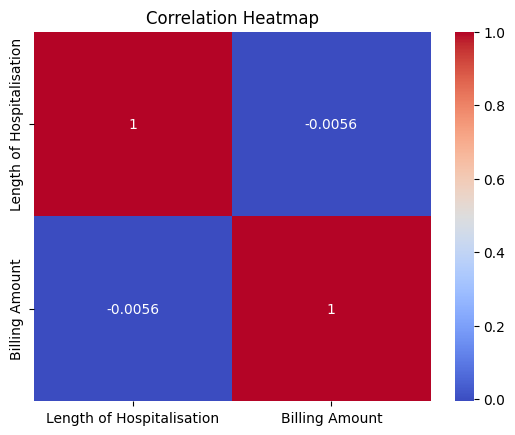

In [9]:
#Correlation heatmap between billing amount and length of hospitalisation

plt.figure()
sns.heatmap(data[['Length of Hospitalisation','Billing Amount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Insights**:

The heatmap shows there is no correlation among the length of hospitalisation and billing amount

## Data Encoding (Suggested)

**Suggested** : Being a good computer science engineer, it is also important to know the computation speed difference caused by encoding the categorical features.

In [10]:
from sklearn.preprocessing import LabelEncoder

cat_columns=data.select_dtypes(include='object').columns
for i in range(len(cat_columns)):
  le=LabelEncoder()
  data[cat_columns[i]]=le.fit_transform(data[cat_columns[i]])

data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Label,Length of Hospitalisation
0,3068,30,1,5,2,1729,26612,29933,1,18856.281306,328,2,1730,3,2,Age2,2
1,15211,62,1,0,5,104,33648,16012,3,33643.327287,265,1,109,1,1,Age4,6
2,6476,76,0,1,5,1233,37828,5473,0,27955.096079,205,1,1247,0,2,Age5,15
3,26935,28,0,6,3,560,22511,12317,3,37909.782410,450,0,589,1,0,Age2,30
4,26241,43,0,2,2,1230,21259,33598,0,14238.317814,458,2,1249,4,0,Age3,20


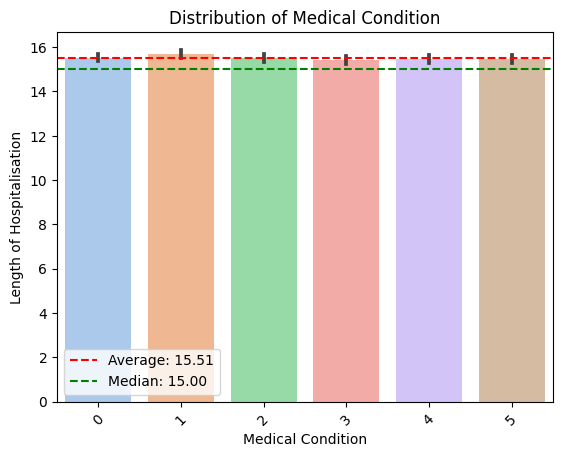

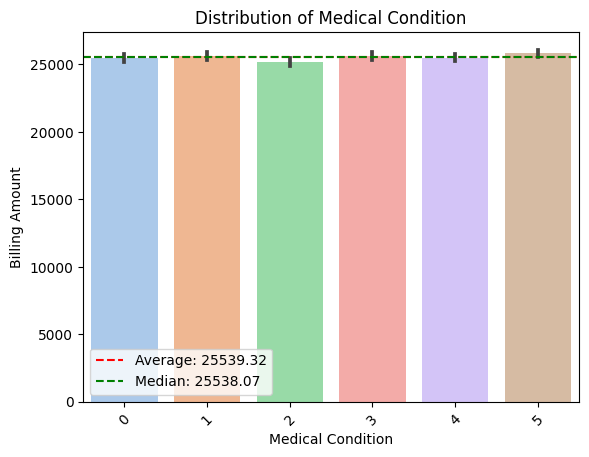

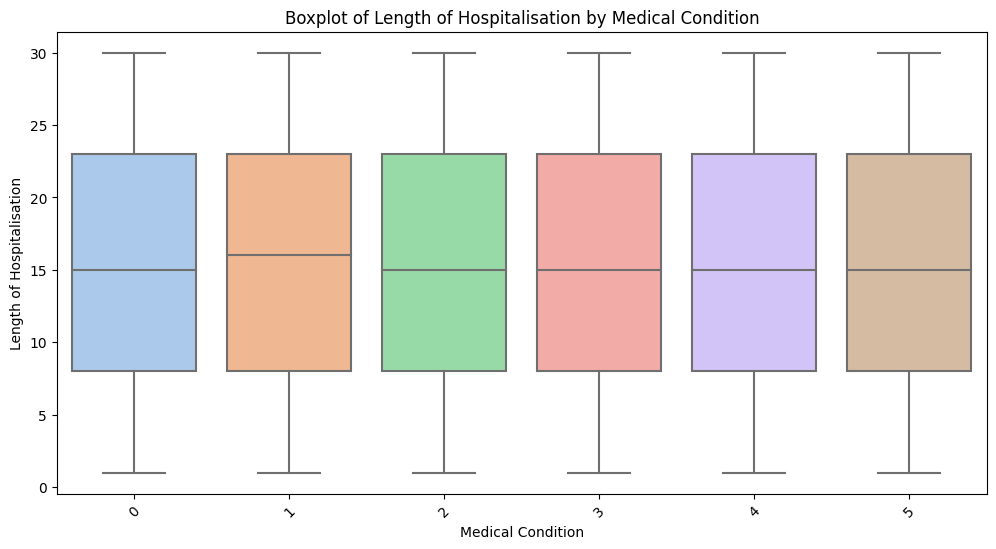

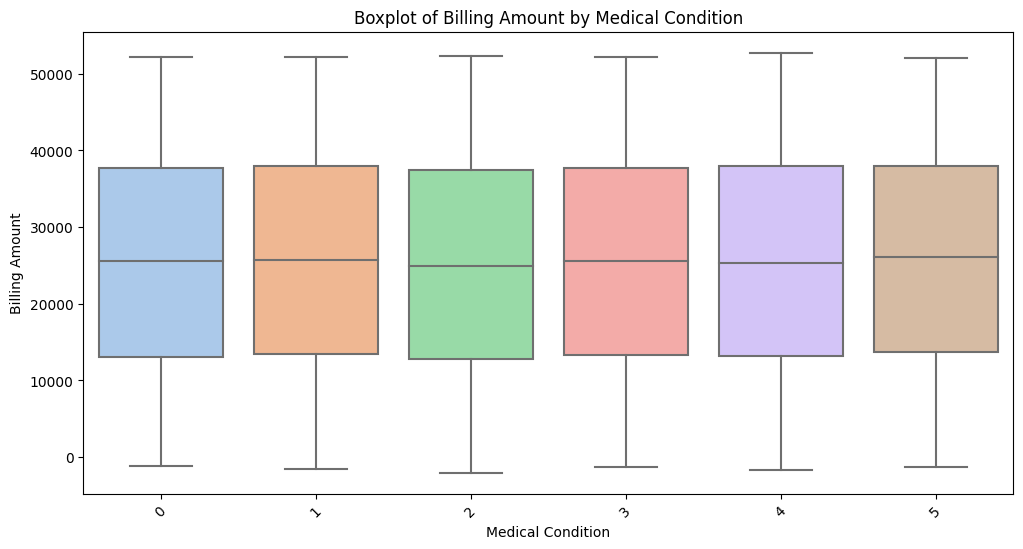

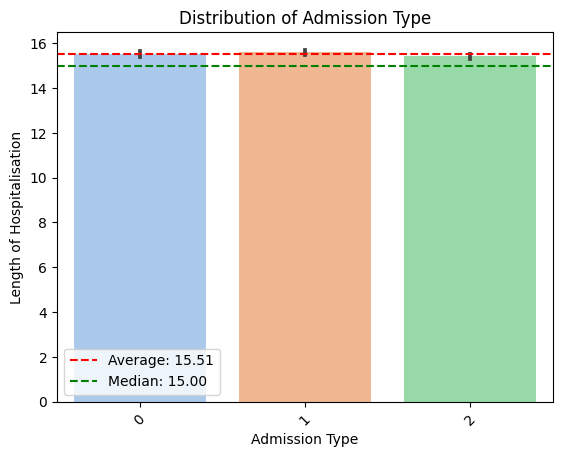

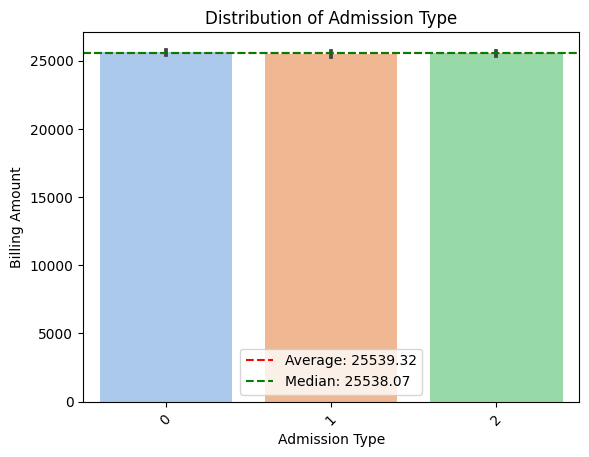

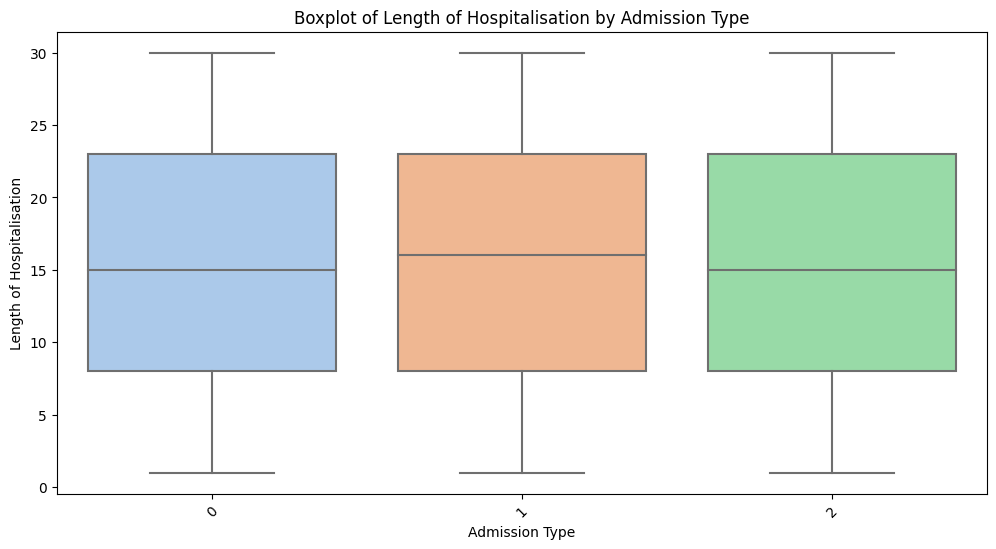

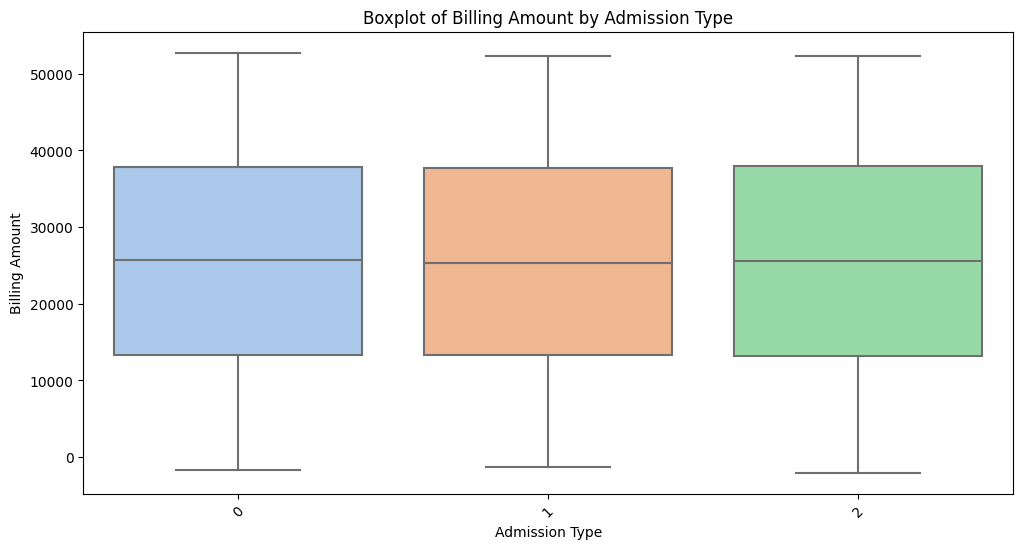

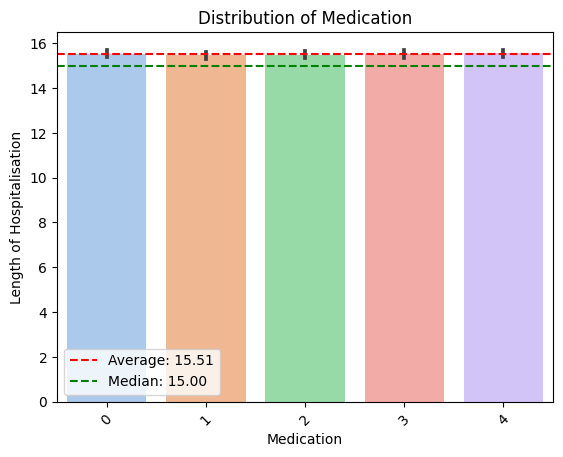

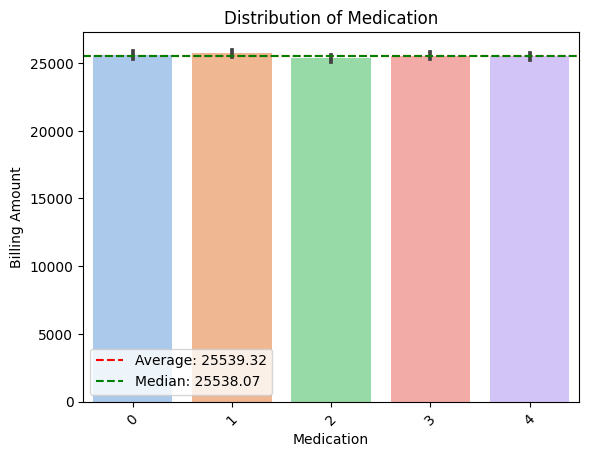

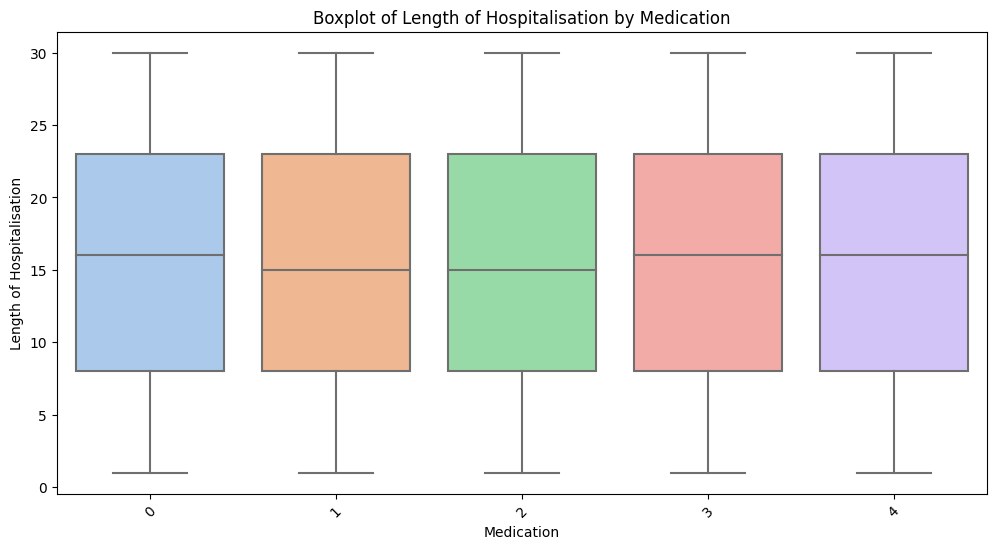

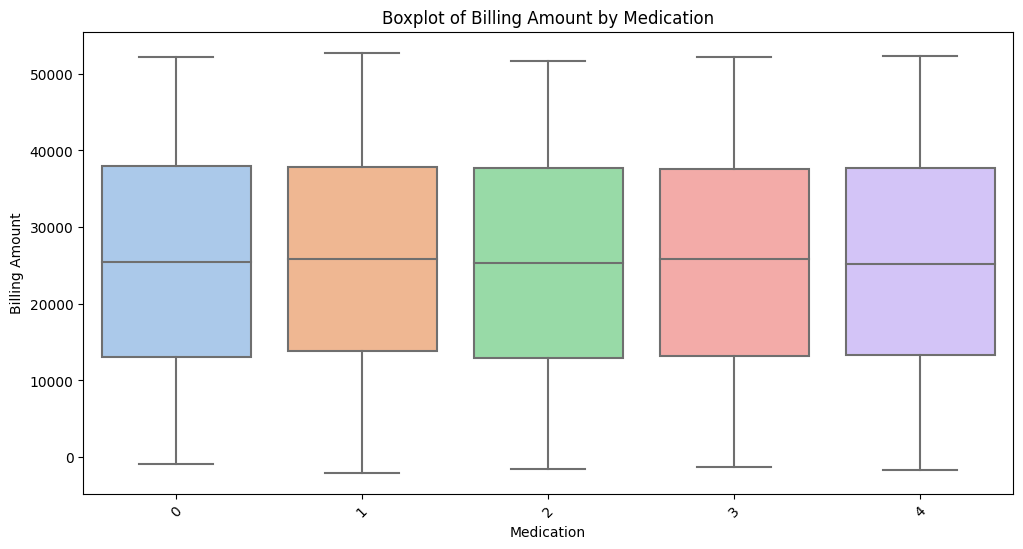

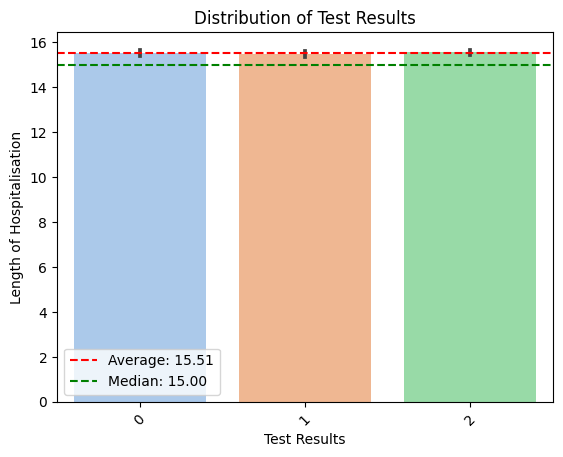

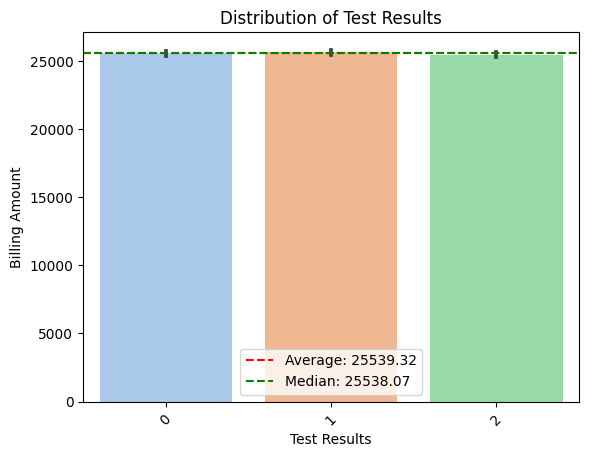

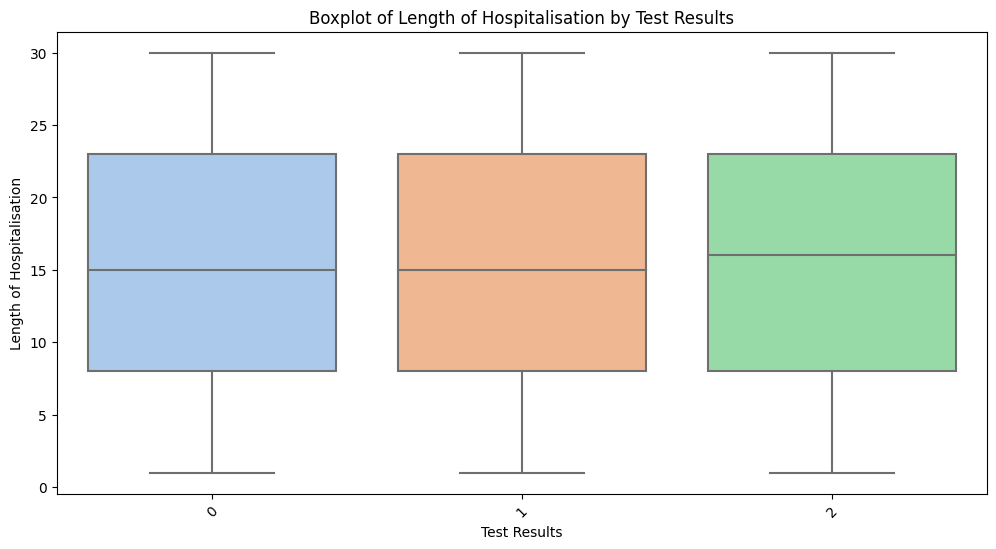

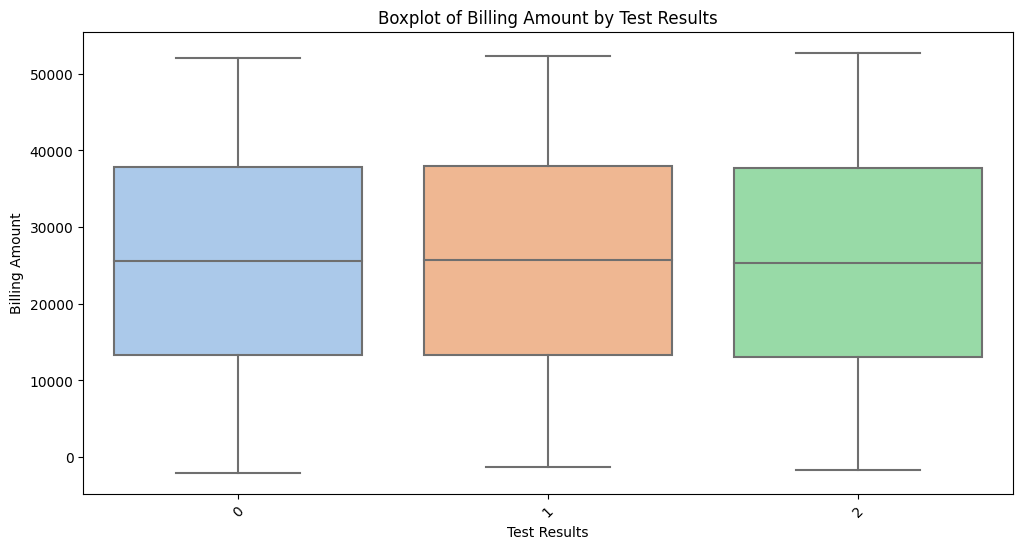

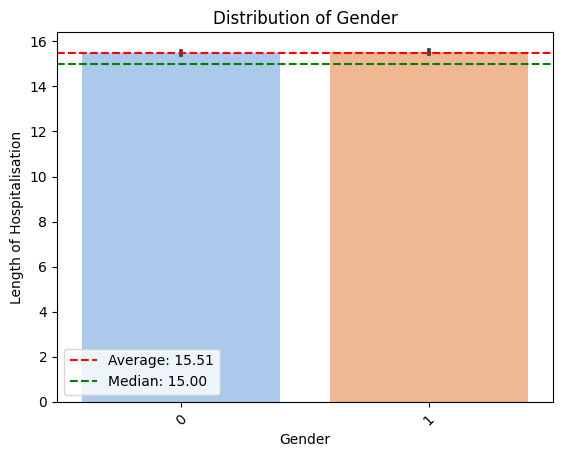

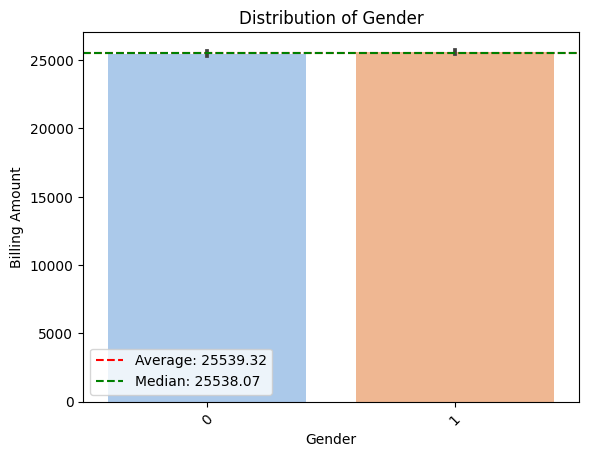

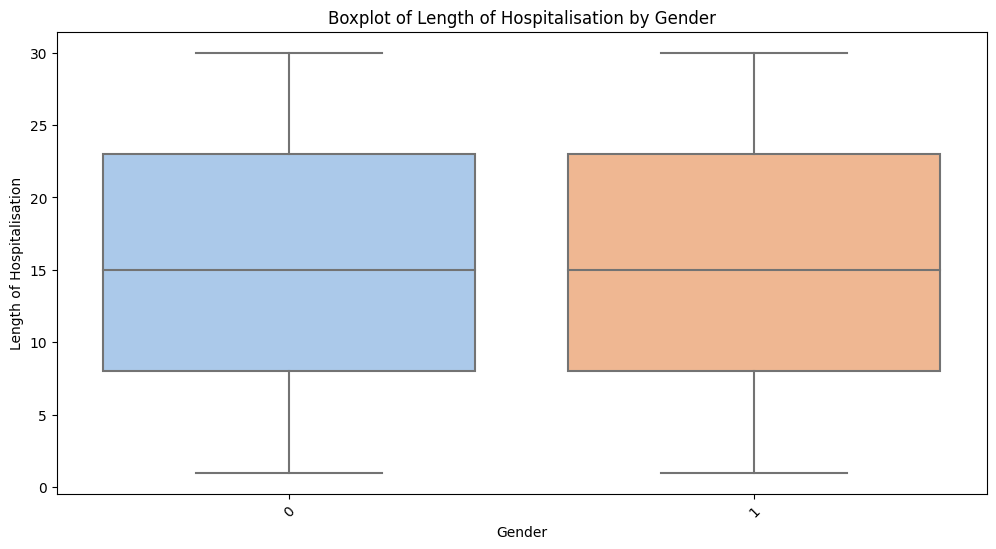

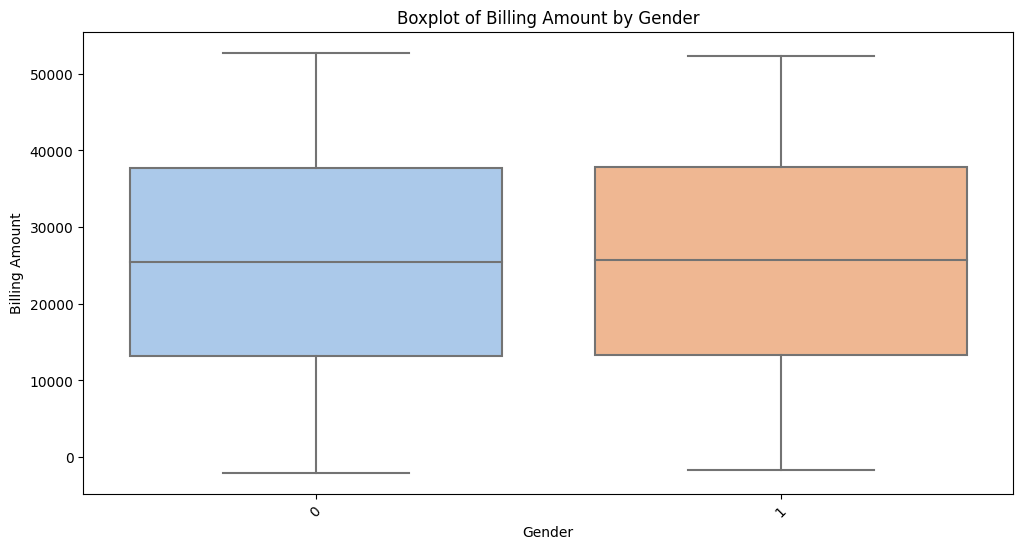

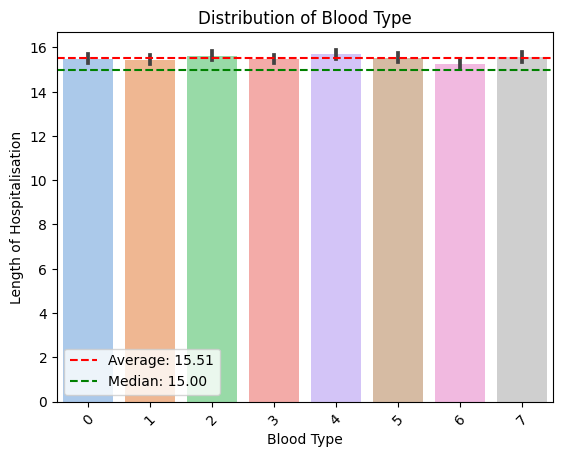

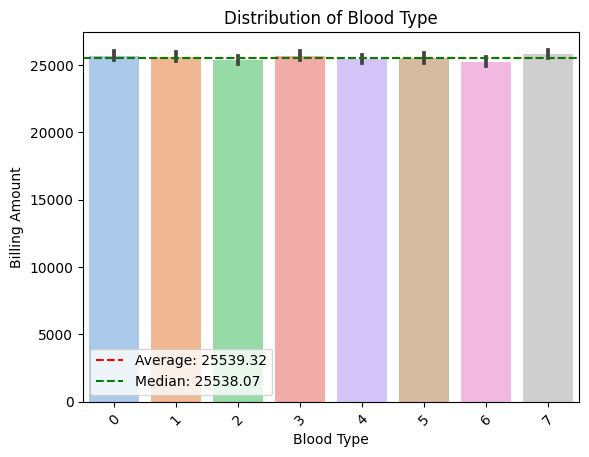

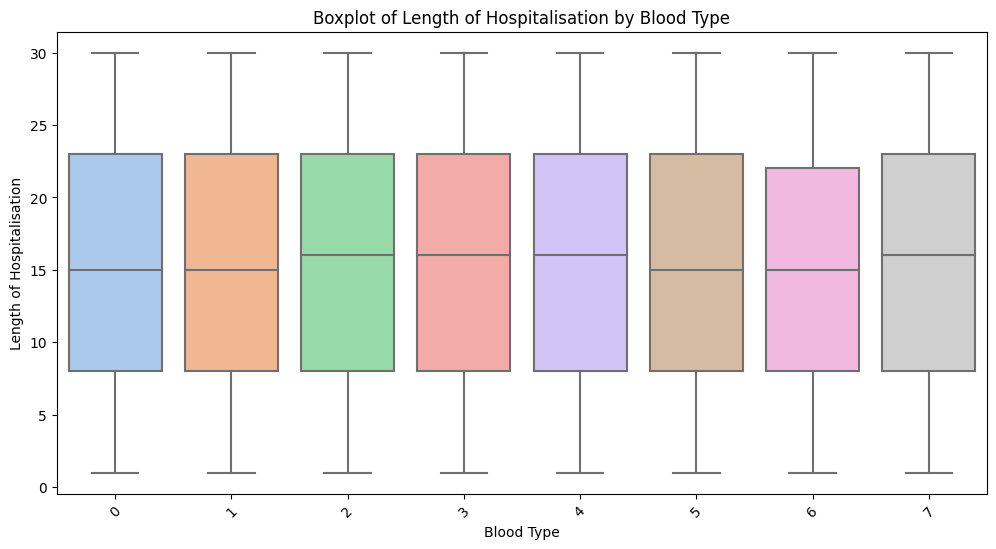

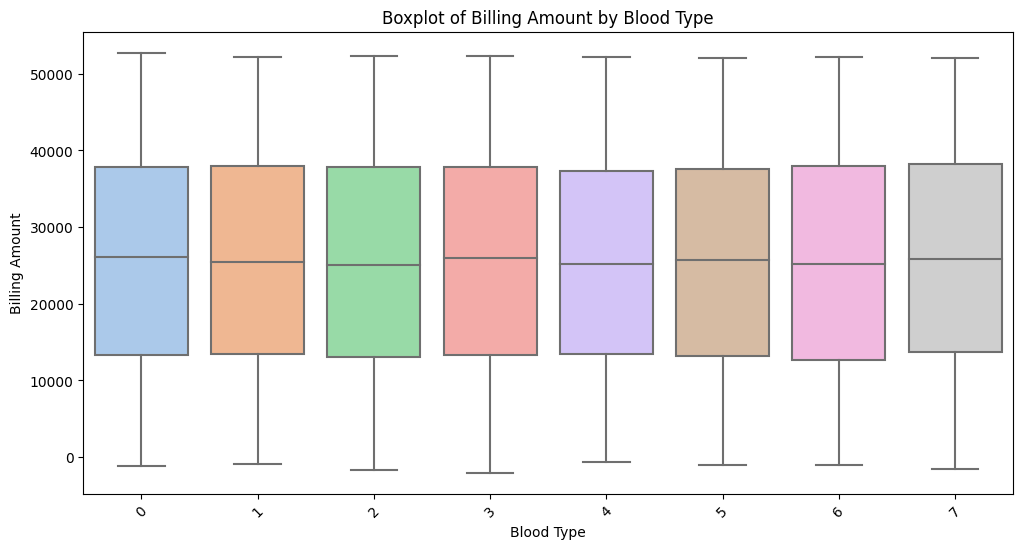

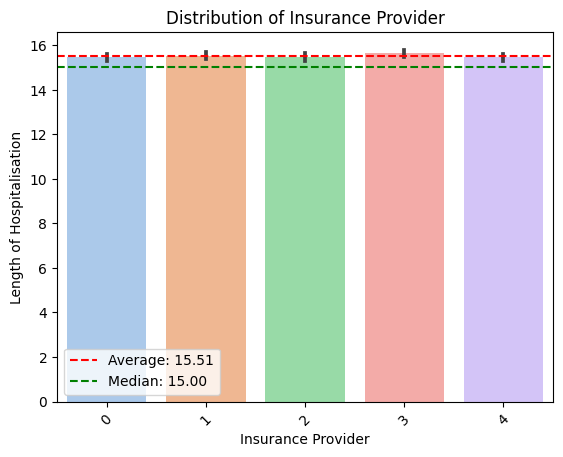

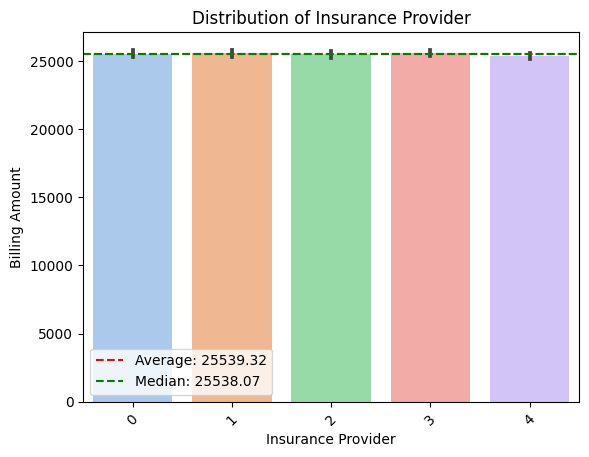

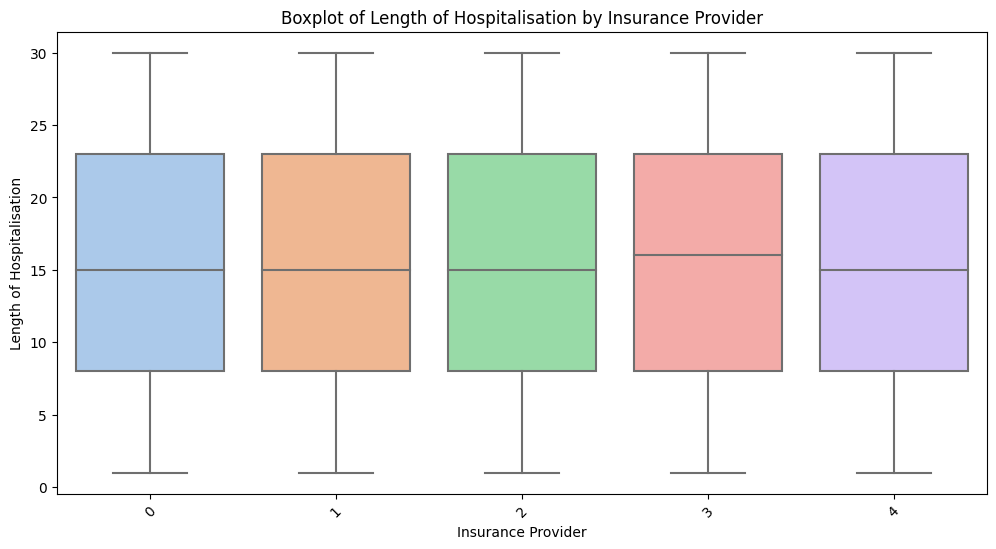

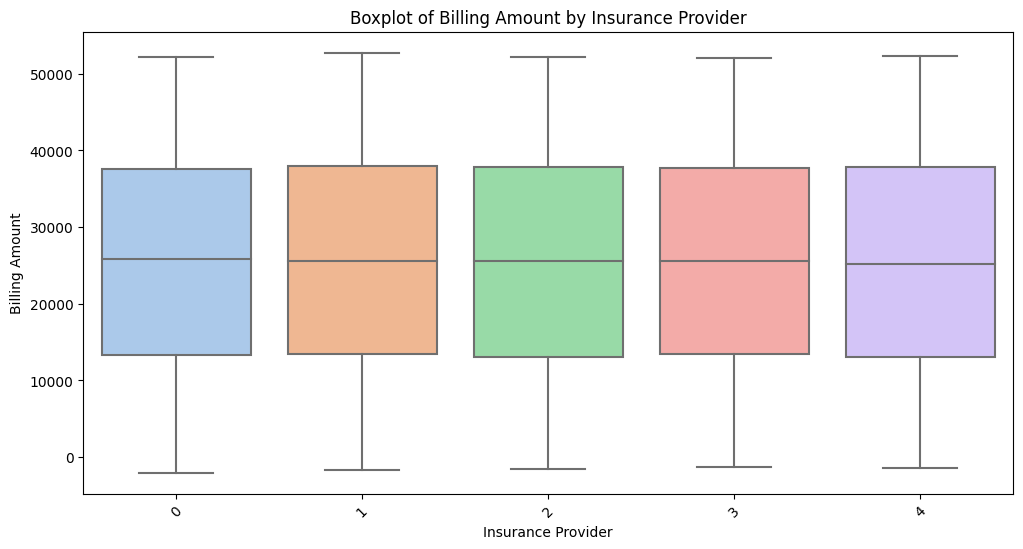

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


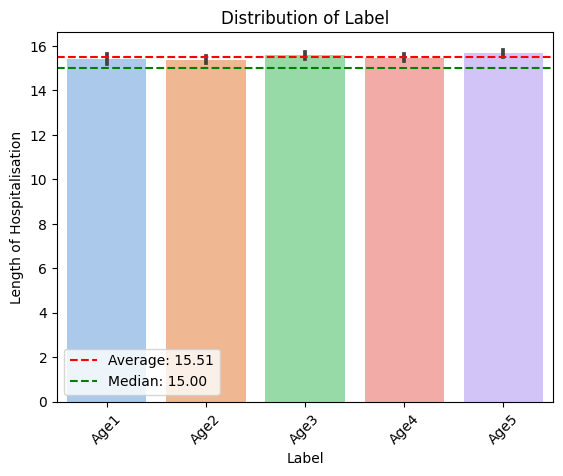

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


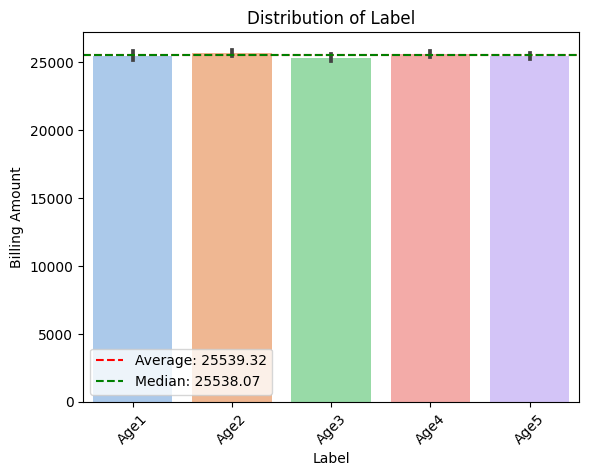

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


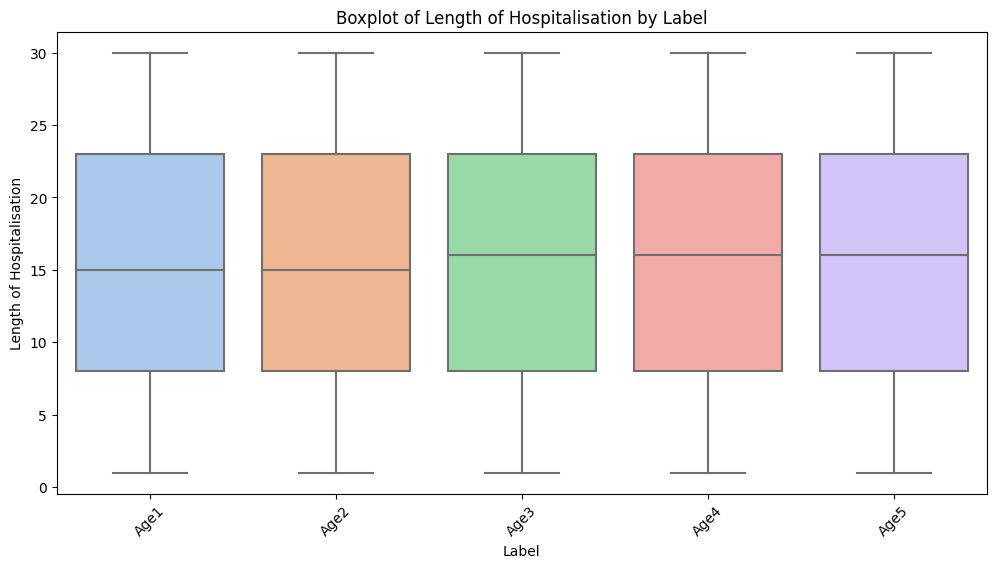

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


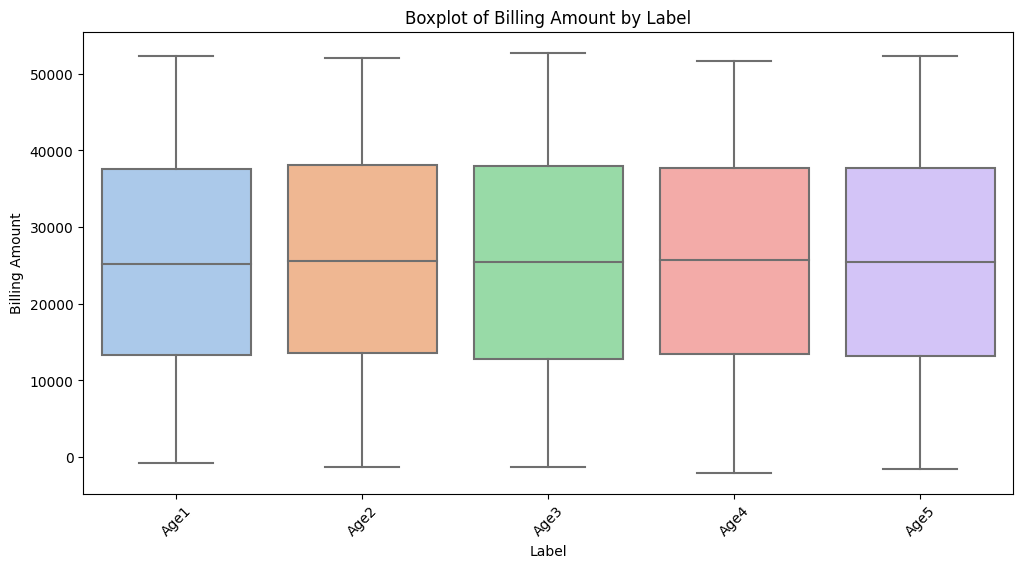

In [11]:
#Testing the Basic Statistical Analysis using encoded categorical columns

for col in columns:
  average_value = np.mean(data['Length of Hospitalisation'])
  median_value = np.median(data['Length of Hospitalisation'])
  sns.barplot(x=col,y='Length of Hospitalisation', data=data, palette='pastel')
  plt.title(f'Distribution of {col}')
  plt.axhline(y=average_value, color='red', linestyle='--', label=f'Average: {average_value:.2f}')
  plt.axhline(y=median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')
  plt.legend()
  plt.xticks(rotation=45)
  plt.show()
  average_value1 = np.mean(data['Billing Amount'])
  median_value1 = np.median(data['Billing Amount'])
  sns.barplot(x=col,y='Billing Amount', data=data, palette='pastel')
  plt.title(f'Distribution of {col}')
  plt.axhline(y=average_value1, color='red', linestyle='--', label=f'Average: {average_value1:.2f}')
  plt.axhline(y=median_value1, color='green', linestyle='--', label=f'Median: {median_value1:.2f}')
  plt.legend()
  plt.xticks(rotation=45)
  plt.show()
  plt.figure(figsize=(12, 6))
  sns.boxplot(x=col, y='Length of Hospitalisation', data=data, palette='pastel')
  plt.title(f'Boxplot of Length of Hospitalisation by {col}')
  plt.xticks(rotation=45)
  plt.show()
  plt.figure(figsize=(12, 6))
  sns.boxplot(x=col, y='Billing Amount', data=data, palette='pastel')
  plt.title(f'Boxplot of Billing Amount by {col}')
  plt.xticks(rotation=45)
  plt.show()



**Insights**:

When I am checking the computation speed difference at the time of running the notebook.
- Speed using non-encoded columns was higher as compared to speed using encoded columns

The speed difference clearly tells us that in simple data visualisation, encoding helps a lot in saving computation time and space, and this also tells us, when applied to a model, it would show more positive effect.

## ANOVA Test

To understand interaction effects

In [12]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Label,Length of Hospitalisation
0,3068,30,1,5,2,1729,26612,29933,1,18856.281306,328,2,1730,3,2,Age2,2
1,15211,62,1,0,5,104,33648,16012,3,33643.327287,265,1,109,1,1,Age4,6
2,6476,76,0,1,5,1233,37828,5473,0,27955.096079,205,1,1247,0,2,Age5,15
3,26935,28,0,6,3,560,22511,12317,3,37909.782410,450,0,589,1,0,Age2,30
4,26241,43,0,2,2,1230,21259,33598,0,14238.317814,458,2,1249,4,0,Age3,20


Using two way ANOVA

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

data_renamed = data.rename(columns={
    'Length of Hospitalisation': 'Length_of_Hospitalisation',
    'Medical Condition': 'Medical_Condition'
})

model = ols('Length_of_Hospitalisation ~ C(Label) * C(Medical_Condition)', data=data_renamed).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                     sum_sq       df         F    PR(>F)
C(Label)                       6.726718e+02      4.0  2.243013  0.061816
C(Medical_Condition)           4.364721e+02      5.0  1.164327  0.323978
C(Label):C(Medical_Condition)  1.535125e+03     20.0  1.023769  0.428595
Residual                       4.157766e+06  55456.0       NaN       NaN


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [14]:
data_renamed = data.rename(columns={
    'Billing Amount': 'Billing_Amount',
    'Medical Condition': 'Medical_Condition'
})

model = ols('Billing_Amount ~ C(Label) * C(Medical_Condition)', data=data_renamed).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                     sum_sq       df         F    PR(>F)
C(Label)                       9.399456e+08      4.0  1.163724  0.324586
C(Medical_Condition)           2.192450e+09      5.0  2.171536  0.054292
C(Label):C(Medical_Condition)  5.545782e+09     20.0  1.373220  0.122758
Residual                       1.119802e+13  55456.0       NaN       NaN


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


**Insights** :

- No significant effect of Age and Medical Condition on Length of Hospitalisation (p value is greater than 5% level of significance)
- The full model Anova with interaction effects also gave insignificant effect of the factors.

## Using Prediction Models

Now we shall use various prediction models and check their relative accuracies in predicting from the data

### Random Forest Regressor

In [15]:
#using random forest model for predicting length of hospitalisation and billing amount based on all the study variables
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


study_var=['Age','Gender','Blood Type','Medical Condition','Insurance Provider','Admission Type','Medication','Test Results']
target_var=['Length of Hospitalisation','Billing Amount']

for i in range(len(target_var)):
  X=data[study_var]
  y=data[target_var[i]]
  X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
  rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
  rf_model.fit(X_train,y_train)
  y_pred=rf_model.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  print(f"Mean Squared Error for {target_var[i]}: {mse}")
  print(f"R-squared for {target_var[i]}: {r2}")

Mean Squared Error for Length of Hospitalisation: 77.63202219705208
R-squared for Length of Hospitalisation: -0.04270495412316411
Mean Squared Error for Billing Amount: 206749761.58408213
R-squared for Billing Amount: -0.03941677257201803


### Gradient Boosting Regression

In [16]:
#using gradient boosting regression for predicting length of hospitalisation and billing amount based on all the study variables
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


for i in range(len(target_var)):
  X=data[study_var]
  y=data[target_var[i]]
  X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
  gb_model=GradientBoostingRegressor(n_estimators=100,random_state=42)
  gb_model.fit(X_train,y_train)
  y_pred=gb_model.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  print(f"Mean Squared Error for {target_var[i]}: {mse}")
  print(f"R-squared for {target_var[i]}: {r2}")


Mean Squared Error for Length of Hospitalisation: 74.46365135326975
R-squared for Length of Hospitalisation: -0.00014937097829181845
Mean Squared Error for Billing Amount: 199311174.57369
R-squared for Billing Amount: -0.0020199115377017574


### XGBoost

In [17]:
#using xgboost for predicting length of hospitalisation and billing amount based on all the study variables
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

for i in range(len(target_var)):
  X=data[study_var]
  y=data[target_var[i]]
  X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
  xgb_model=xgb.XGBRegressor(n_estimators=100,random_state=4)
  xgb_model.fit(X_train,y_train)
  y_pred=xgb_model.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  print(f"Mean Squared Error for {target_var[i]}: {mse}")
  print(f"R-squared for {target_var[i]}: {r2}")

Mean Squared Error for Length of Hospitalisation: 76.731122173007
R-squared for Length of Hospitalisation: -0.03060462629894367
Mean Squared Error for Billing Amount: 205593266.2983241
R-squared for Billing Amount: -0.03360259127281262


**Insights**:

The above three prediction models also give a poor value of R-square which also shows that the features mentioned in the problem cannot be used for predicting length of hospitalisation or billing amount.

# Conclusion

- The study variables given in the dataset, do not show any significant influence on the dependent variables and hence, cannot be used for creating a prediction model.
- Thus it is suggested to identify a different set of features for creating appropriate models.

Feel free to comment your suggestions for improvement !